In [1]:
# Import packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from collections import Counter
from parser_final import RobustFrailMCIpreprocess

In [2]:
# Function to show classification report for Cross Validation
def classification_report_with_accuracy_score(y_true, y_pred):
    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

In [3]:
# Conduct High Correlation Filter

# Conduct mapping for Feature Names
featureName_mapping = {
    "A1_1" : "Vitamin B12 (pmol/L)",
    "A1_2" : "Serum Folate (nmol/L)",
    "A2_1" : "Serum Homocysteine (µmol/L)",
    "A3_1" : "25-hydroxy Vitamin D (nmol/L)",
    "B1_a" : "Haemoglobin (g/L)",
    "B1_a1" : "RBC (/L)",
    "B1_a2" : "PCV (L/L)",
    "B1_a3" : "MCV (fL)",
    "B1_a4" : "MCH (pg)",
    "B1_a5" : "MCHC (g/L)",
    "B1_a6" : "RDW (%)",
    "B1_b" : "White Cell Count (/L)",
    "B1_b1" : "Neutrophils (/L)",
    "B1_b2" : "Lymphocytes (/L)",
    "B1_b3" : "Monocytes (/L)",
    "B1_b4" : "Eosinophils (/L)",
    "B1_b5" : "Basophils (/L)",
    "B1_c" : "Platelets (/L)",
    "B1_d" : "Glucose (mmol/L)",
    "B2_a1" : "Total Cholesterol (mmol/L)",
    "B2_a2" : "Triglyceride (mmol/L)",
    "B2_a3" : "HDL Cholesterol (mmol/L)",
    "B2_a4" : "LDL Cholesterol (mmol/L)",
    "B2_a5" : "Total Cholesterol/HDL Ratio",
    "B2_b1" : "Sodium (mmol/L)",
    "B2_b2" : "Potassium (mmol/L)",
    "B2_b3" : "Chloride (mmol/L)",
    "B2_c1" : 'Urea (mmol/L)',
    "B2_c2" : "Creatinine (umol/L)",
    "B2_c3" : "eGFR (mL/min/1.73m2)",
    "B2_c4" : "Uric Acid (mmol/L)",
    "B2_c5" : "Calcium (mmol/L)",
    "B2_c6" : "Corrected Calcium (mmol/L)",
    "B2_c7" : "Phosphate (mmol/L)",
    "B2_d1" : "Total Protein (g/L)",
    "B2_d2" : "Albumin (g/L)",
    "B2_d3" : "Globulin (g/L)",
    "B2_d4" : "Albumin/Globulin ratio",
    "B2_d5" : "Alkaline Phosphatase (U/L)",
    "B2_d6" : "Total Bilirubin (µmol/L)",
    "B2_d7" : "GGT",
    "B2_d8" : "AST",
    "B2_d9" : "ALT",
    "B3" : "C-Reactive Protein",
    "B4_a1" : "Protein",
    "B4_a2" : "pH",
    "B4_a3" : "Glucose",
    "B4_a4" : "Ketones",
    "B4_a5" : "S.G.",
    "B4_a6" : "Blood",
    "B4_b1" : "Leucocytes (/L)",
    "B4_b2" : "Erythrocytes (/L)",
    "B4_b3" : "Epithelial Cells",
    "B5_a1" : "Free Thyroxine (FT4) (pmol/L)",
    "B5_a2" : "Thyroid Stimulating Hormone (mIU/L)",
    "B5_a3" : "Free Tri-iodothyronine (FT3) (pmol/L)",
    "B6" : "HbA1c"
}

In [4]:
# Test 1: New Dataset, 6 Classes

In [5]:
# Pre-parse the dataset
data = RobustFrailMCIpreprocess("rawfile_blood.csv")

robust          368
prefrail_mci    268
prefrail        250
mci             142
frail_mci        86
frail             9
Name: condition, dtype: int64

####################################################################
Number of Rows of Dataframe:
1123
Number of Columns of Dataframe:
59

####################################################################
Threshold for number of NULLs in a column: 0.1095
Number of Columns before Parsing for Too Many NULLs in a column:
59
Number of Columns after Parsing for Too Many NULLs in a column:
51

Columns Removed:
B1_b5
B4_a1
B4_a3
B4_a4
B4_a6
B4_b1
B4_b3
B5_a1

####################################################################
Number of Columns after dropping B1_b4, B2_c3, B4_b2 for inconsistent data types:
48

####################################################################
Number of Rows before Parsing NULLs in data:
1123
Number of Rows after Parsing NULLs in data:
1015


In [6]:
c = data['condition'].value_counts()
condition = c.index
c

robust          343
prefrail_mci    233
prefrail        223
mci             133
frail_mci        76
frail             7
Name: condition, dtype: int64

In [7]:
for i in range(len(condition)):
    data['condition'].replace(condition[i], i, inplace = True)

data.head()

,mtag,condition,A1_1,A1_2,A2_1,A3_1,B1_a,B1_a1,B1_a2,B1_a3,...,B2_d6,B2_d7,B2_d8,B2_d9,B3,B4_a2,B4_a5,B5_a2,B5_a3,B6
0,ME02646,5,196,32.7,24,46.5,121,3.93,0.37,95,...,7,12,13,6,0.2,6.0,1.011,1.14,4.1,5.9
1,ME03109,5,200,28.2,23,55.6,142,4.82,0.42,87,...,7,20,17,26,3.1,5.0,1.011,3.25,4.6,8.5
2,ME06997,5,441,44.4,20,76.8,105,4.54,0.41,90,...,5,16,19,15,1.4,7.0,1.023,2.14,4.0,6.4
3,ME07149,5,265,20.7,16,47.2,122,4.53,0.39,86,...,8,24,19,21,2.1,5.5,1.012,1.06,4.7,6.1
4,ME07700,5,425,13.5,14,31.3,124,4.44,0.38,85,...,6,20,23,23,6.0,5.5,1.013,1.95,3.8,5.8


In [8]:
data.tail()

,mtag,condition,A1_1,A1_2,A2_1,A3_1,B1_a,B1_a1,B1_a2,B1_a3,...,B2_d6,B2_d7,B2_d8,B2_d9,B3,B4_a2,B4_a5,B5_a2,B5_a3,B6
1010,MV00454,0,220,24.6,19,67.5,138,4.66,0.42,91,...,20,10,17,8,6.6,7.0,1.015,1.29,4.5,6.2
1011,MV00456,0,334,20.1,18,51.0,139,4.63,0.42,91,...,16,22,35,40,1.0,6.0,1.015,1.88,3.9,5.6
1012,MV00460,0,418,54.4,17,61.0,122,4.18,0.38,90,...,19,20,23,15,0.4,6.5,1.005,3.58,4.0,5.6
1013,MV00502,0,393,38.2,18,43.1,136,4.57,0.43,94,...,13,11,22,23,0.7,7.0,1.009,0.92,4.1,6.0
1014,MV00510,0,371,23.2,24,55.9,127,4.41,0.40,90,...,13,14,16,12,7.5,8.0,1.017,2.45,4.5,6.2


In [9]:
y = data['condition']

features = ['A1_1', 'A1_2', 'A2_1', 'A3_1', 'B1_a', 'B1_a1', 'B1_a2',
       'B1_a3', 'B1_a4', 'B1_a5', 'B1_a6', 'B1_b', 'B1_b1', 'B1_b2', 'B1_b3',
       'B1_c', 'B1_d', 'B2_a1', 'B2_a2', 'B2_a3', 'B2_a4', 'B2_a5', 'B2_b1',
       'B2_b2', 'B2_b3', 'B2_c1', 'B2_c2', 'B2_c4', 'B2_c5', 'B2_c6', 'B2_c7',
       'B2_d1', 'B2_d2', 'B2_d3', 'B2_d4', 'B2_d5', 'B2_d6', 'B2_d7', 'B2_d8',
       'B2_d9', 'B3', 'B4_a2', 'B4_a5', 'B5_a2', 'B5_a3', 'B6']
X_old = data[features]

X = X_old
X = StandardScaler().fit_transform(X_old)
X = MinMaxScaler().fit_transform(X_old)

In [10]:
# Summarise the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 343, 1: 233, 2: 223, 3: 133, 4: 76, 5: 7})


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

# Logistic Regression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
print("Logistic Regression:", log_model.score(X_test, y_test).round(3))

# Linear Discriminant Analysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
print("Linear Discriminant Analysis:", lda_model.score(X_test, y_test).round(3))

# K-Nearest Neigbors

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
print("K-Nearest Neigbors:", knn_model.score(X_test, y_test).round(3))

# Classification and Regression Trees

cart_model = DecisionTreeClassifier()
cart_model.fit(X_train, y_train)
print("Classification and Regression Trees:", cart_model.score(X_test, y_test).round(3))

# Gaussian Naive Bayes

gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
print("Gaussian Naive Bayes:", gnb_model.score(X_test, y_test).round(3))

# Support Vector Machines

svm_model = SVC(kernel='linear', gamma = 'auto', probability=True)
svm_model.fit(X_train, y_train)
print("Support Vector Machines:", svm_model.score(X_test, y_test).round(3))

# Random Forest Classifier

rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)
print("Random Forest Classifier:", rfc_model.score(X_test, y_test).round(3))

Logistic Regression: 0.382
Linear Discriminant Analysis: 0.35
K-Nearest Neigbors: 0.35


C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Classification and Regression Trees: 0.273
Gaussian Naive Bayes: 0.367
Support Vector Machines: 0.382
Random Forest Classifier: 0.377


In [12]:
# Calculating for Logistic Regression
log_pred = log_model.predict(X_test)

print('Performance Metrics for Logistic Regression:\n')
print(accuracy_score(y_test, log_pred).round(5), '\n')
print(confusion_matrix(y_test, log_pred), '\n')
print(classification_report(y_test, log_pred))

Performance Metrics for Logistic Regression:

0.38177 

[[104  23  20   0   0   0]
 [ 42  35  12   0   0   0]
 [ 45  19  16   0   0   0]
 [ 26  14  11   0   0   0]
 [ 10  20   4   0   0   0]
 [  3   2   0   0   0   0]] 

              precision    recall  f1-score   support

           0       0.45      0.71      0.55       147
           1       0.31      0.39      0.35        89
           2       0.25      0.20      0.22        80
           3       0.00      0.00      0.00        51
           4       0.00      0.00      0.00        34
           5       0.00      0.00      0.00         5

    accuracy                           0.38       406
   macro avg       0.17      0.22      0.19       406
weighted avg       0.28      0.38      0.32       406



C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
# Calculating for LDA
lda_pred = lda_model.predict(X_test)

print('Performance Metrics for LDA:\n')
print(accuracy_score(y_test, lda_pred).round(5), '\n')
print(confusion_matrix(y_test, lda_pred), '\n')
print(classification_report(y_test, lda_pred))

Performance Metrics for LDA:

0.34975 

[[89 27 26  3  1  1]
 [29 35 17  5  2  1]
 [38 19 17  3  1  2]
 [19 18 11  1  1  1]
 [ 9 17  4  3  0  1]
 [ 3  2  0  0  0  0]] 

              precision    recall  f1-score   support

           0       0.48      0.61      0.53       147
           1       0.30      0.39      0.34        89
           2       0.23      0.21      0.22        80
           3       0.07      0.02      0.03        51
           4       0.00      0.00      0.00        34
           5       0.00      0.00      0.00         5

    accuracy                           0.35       406
   macro avg       0.18      0.21      0.19       406
weighted avg       0.29      0.35      0.31       406



In [14]:
# Calculating for kNN
knn_pred = knn_model.predict(X_test)

print('Performance Metrics for KNN:\n')
print(accuracy_score(y_test, knn_pred).round(5), '\n')
print(confusion_matrix(y_test, knn_pred), '\n')
print(classification_report(y_test, knn_pred))

Performance Metrics for KNN:

0.34975 

[[100  25  16   6   0   0]
 [ 45  29  10   4   1   0]
 [ 45  19  12   4   0   0]
 [ 27  16   6   1   1   0]
 [ 14  14   3   3   0   0]
 [  0   3   1   1   0   0]] 

              precision    recall  f1-score   support

           0       0.43      0.68      0.53       147
           1       0.27      0.33      0.30        89
           2       0.25      0.15      0.19        80
           3       0.05      0.02      0.03        51
           4       0.00      0.00      0.00        34
           5       0.00      0.00      0.00         5

    accuracy                           0.35       406
   macro avg       0.17      0.20      0.17       406
weighted avg       0.27      0.35      0.30       406



C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
# Calculating for CART
cart_pred = cart_model.predict(X_test)

print('Performance Metrics for CART:\n')
print(accuracy_score(y_test, cart_pred).round(5), '\n')
print(confusion_matrix(y_test, cart_pred), '\n')
print(classification_report(y_test, cart_pred))

Performance Metrics for CART:

0.2734 

[[40 24 49 30  4  0]
 [22 30 19 14  4  0]
 [22 17 27  8  6  0]
 [12  7 17 12  3  0]
 [ 4 16  9  3  2  0]
 [ 1  1  2  0  1  0]] 

              precision    recall  f1-score   support

           0       0.40      0.27      0.32       147
           1       0.32      0.34      0.33        89
           2       0.22      0.34      0.27        80
           3       0.18      0.24      0.20        51
           4       0.10      0.06      0.07        34
           5       0.00      0.00      0.00         5

    accuracy                           0.27       406
   macro avg       0.20      0.21      0.20       406
weighted avg       0.29      0.27      0.27       406



C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# Calculating for GNB
gnb_pred = log_model.predict(X_test)

print('Performance Metrics for GNB:\n')
print(accuracy_score(y_test, gnb_pred).round(5), '\n')
print(confusion_matrix(y_test, gnb_pred), '\n')
print(classification_report(y_test, gnb_pred))

Performance Metrics for GNB:

0.38177 

[[104  23  20   0   0   0]
 [ 42  35  12   0   0   0]
 [ 45  19  16   0   0   0]
 [ 26  14  11   0   0   0]
 [ 10  20   4   0   0   0]
 [  3   2   0   0   0   0]] 

              precision    recall  f1-score   support

           0       0.45      0.71      0.55       147
           1       0.31      0.39      0.35        89
           2       0.25      0.20      0.22        80
           3       0.00      0.00      0.00        51
           4       0.00      0.00      0.00        34
           5       0.00      0.00      0.00         5

    accuracy                           0.38       406
   macro avg       0.17      0.22      0.19       406
weighted avg       0.28      0.38      0.32       406



C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
# Calculating for Support Vector Machine
svm_pred = svm_model.predict(X_test)

print('Performance Metrics for SVM:\n')
print(accuracy_score(y_test, svm_pred).round(5), '\n')
print(confusion_matrix(y_test, svm_pred), '\n')
print(classification_report(y_test, svm_pred))

Performance Metrics for SVM:

0.38177 

[[113  22  12   0   0   0]
 [ 49  33   7   0   0   0]
 [ 54  17   9   0   0   0]
 [ 28  15   8   0   0   0]
 [ 11  20   3   0   0   0]
 [  3   2   0   0   0   0]] 

              precision    recall  f1-score   support

           0       0.44      0.77      0.56       147
           1       0.30      0.37      0.33        89
           2       0.23      0.11      0.15        80
           3       0.00      0.00      0.00        51
           4       0.00      0.00      0.00        34
           5       0.00      0.00      0.00         5

    accuracy                           0.38       406
   macro avg       0.16      0.21      0.17       406
weighted avg       0.27      0.38      0.30       406



C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
# Calculating for Random Forest Classifier
rfc_pred = rfc_model.predict(X_test)

print('Performance Metrics for RFC:\n')
print(accuracy_score(y_test, rfc_pred).round(5), '\n')
print(confusion_matrix(y_test, rfc_pred), '\n')
print(classification_report(y_test, rfc_pred))

Performance Metrics for RFC:

0.37685 

[[108  22  17   0   0   0]
 [ 40  32  15   2   0   0]
 [ 47  20  13   0   0   0]
 [ 30  12   9   0   0   0]
 [  8  19   6   1   0   0]
 [  2   2   1   0   0   0]] 

              precision    recall  f1-score   support

           0       0.46      0.73      0.57       147
           1       0.30      0.36      0.33        89
           2       0.21      0.16      0.18        80
           3       0.00      0.00      0.00        51
           4       0.00      0.00      0.00        34
           5       0.00      0.00      0.00         5

    accuracy                           0.38       406
   macro avg       0.16      0.21      0.18       406
weighted avg       0.27      0.38      0.31       406



C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
# Logistic Regression

log_model = LogisticRegression()
log_model.fit(X, y)
scores = cross_val_score(log_model, X, y, cv=5)
print("Logistic Regression: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# Linear Discriminant Analysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X, y)
scores = cross_val_score(lda_model, X, y, cv=5)
print("Linear Discriminant Analysis: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# K-Nearest Neigbors

knn_model = KNeighborsClassifier()
knn_model.fit(X, y)
scores = cross_val_score(knn_model, X, y, cv=5)
print("K-Nearest Neighbors: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# Classification and Regression Trees

cart_model = DecisionTreeClassifier()
cart_model.fit(X, y)
scores = cross_val_score(cart_model, X, y, cv=5)
print("Classification and Regression Trees: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# Gaussian Naive Bayes

gnb_model = GaussianNB()
gnb_model.fit(X, y)
scores = cross_val_score(gnb_model, X, y, cv=5)
print("Gaussian Naive Bayes: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# Support Vector Machines

svm_model = SVC(kernel='linear', gamma = 'auto', probability=True)
svm_model.fit(X, y)
scores = cross_val_score(svm_model, X, y, cv=5)
print("Support Vector Machines: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# Random Forest Classifier

rfc_model = RandomForestClassifier()
rfc_model.fit(X, y)
scores = cross_val_score(rfc_model, X, y, cv=5)
print("Random Forest Classifier: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

Logistic Regression: 0.388 accuracy with a standard deviation of 0.045
Linear Discriminant Analysis: 0.363 accuracy with a standard deviation of 0.033
K-Nearest Neighbors: 0.314 accuracy with a standard deviation of 0.027
Classification and Regression Trees: 0.265 accuracy with a standard deviation of 0.020
Gaussian Naive Bayes: 0.331 accuracy with a standard deviation of 0.030
Support Vector Machines: 0.390 accuracy with a standard deviation of 0.036
Random Forest Classifier: 0.356 accuracy with a standard deviation of 0.037


In [20]:
# Logistic Regression
scores = cross_val_score(log_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.44      0.91      0.59        68
           1       0.52      0.52      0.52        46
           2       0.40      0.13      0.20        45
           3       0.00      0.00      0.00        27
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         2

    accuracy                           0.45       203
   macro avg       0.23      0.26      0.22       203
weighted avg       0.35      0.45      0.36       203



C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-sco

              precision    recall  f1-score   support

           0       0.41      0.69      0.51        68
           1       0.34      0.43      0.38        47
           2       0.16      0.09      0.11        45
           3       0.50      0.04      0.07        26
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         2

    accuracy                           0.35       203
   macro avg       0.24      0.21      0.18       203
weighted avg       0.32      0.35      0.29       203

              precision    recall  f1-score   support

           0       0.48      0.75      0.58        69
           1       0.33      0.47      0.39        47
           2       0.24      0.11      0.15        44
           3       0.17      0.04      0.06        26
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00         1

    accuracy                           0.39       203
   macro avg       0.20

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\env

              precision    recall  f1-score   support

           0       0.45      0.87      0.59        69
           1       0.38      0.45      0.41        47
           2       0.18      0.05      0.07        44
           3       1.00      0.04      0.07        27
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         1

    accuracy                           0.41       203
   macro avg       0.34      0.23      0.19       203
weighted avg       0.41      0.41      0.32       203

              precision    recall  f1-score   support

           0       0.36      0.70      0.48        69
           1       0.25      0.28      0.27        46
           2       0.25      0.09      0.13        45
           3       0.33      0.04      0.07        27
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         1

    accuracy                           0.33       203
   macro avg       0.20

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# Linear Discriminant Analysis
scores = cross_val_score(lda_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.44      0.79      0.57        68
           1       0.44      0.50      0.47        46
           2       0.29      0.16      0.20        45
           3       0.00      0.00      0.00        27
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         2

    accuracy                           0.41       203
   macro avg       0.20      0.24      0.21       203
weighted avg       0.31      0.41      0.34       203

              precision    recall  f1-score   support

           0       0.45      0.63      0.52        68
           1       0.39      0.47      0.43        47
           2       0.14      0.09      0.11        45
           3       0.12      0.04      0.06        26
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         2

    accuracy                           0.34       203
   macro avg       0.18

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
# K-Nearest Neigbors
knn_model = KNeighborsClassifier()
knn_model.fit(X, y)
scores = cross_val_score(knn_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.41      0.76      0.53        68
           1       0.33      0.35      0.34        46
           2       0.12      0.04      0.07        45
           3       0.00      0.00      0.00        27
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         2

    accuracy                           0.34       203
   macro avg       0.14      0.19      0.16       203
weighted avg       0.24      0.34      0.27       203



C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.34      0.59      0.43        68
           1       0.21      0.19      0.20        47
           2       0.19      0.13      0.16        45
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         2

    accuracy                           0.27       203
   macro avg       0.12      0.15      0.13       203
weighted avg       0.21      0.27      0.23       203



C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\env

              precision    recall  f1-score   support

           0       0.39      0.54      0.45        69
           1       0.37      0.43      0.40        47
           2       0.21      0.18      0.19        44
           3       0.23      0.12      0.15        26
           4       1.00      0.06      0.12        16
           5       0.00      0.00      0.00         1

    accuracy                           0.34       203
   macro avg       0.37      0.22      0.22       203
weighted avg       0.37      0.34      0.31       203

              precision    recall  f1-score   support

           0       0.36      0.65      0.46        69
           1       0.37      0.32      0.34        47
           2       0.12      0.07      0.09        44
           3       0.00      0.00      0.00        27
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         1

    accuracy                           0.31       203
   macro avg       0.14

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# Classification and Regression Trees
cart_model = DecisionTreeClassifier()
cart_model.fit(X, y)
scores = cross_val_score(cart_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        68
           1       0.27      0.26      0.26        46
           2       0.21      0.18      0.19        45
           3       0.14      0.11      0.12        27
           4       0.06      0.07      0.06        15
           5       0.00      0.00      0.00         2

    accuracy                           0.27       203
   macro avg       0.17      0.18      0.17       203
weighted avg       0.25      0.27      0.26       203

              precision    recall  f1-score   support

           0       0.41      0.35      0.38        68
           1       0.19      0.19      0.19        47
           2       0.24      0.24      0.24        45
           3       0.04      0.04      0.04        26
           4       0.08      0.13      0.10        15
           5       0.00      0.00      0.00         2

    accuracy                           0.23       203
   macro avg       0.16

In [24]:
# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X, y)
scores = cross_val_score(gnb_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.43      0.66      0.52        68
           1       0.38      0.24      0.29        46
           2       0.32      0.16      0.21        45
           3       0.22      0.30      0.25        27
           4       0.22      0.13      0.17        15
           5       0.00      0.00      0.00         2

    accuracy                           0.36       203
   macro avg       0.26      0.25      0.24       203
weighted avg       0.35      0.36      0.33       203

              precision    recall  f1-score   support

           0       0.38      0.53      0.44        68
           1       0.38      0.26      0.30        47
           2       0.11      0.04      0.06        45
           3       0.20      0.27      0.23        26
           4       0.15      0.20      0.17        15
           5       0.00      0.00      0.00         2

    accuracy                           0.30       203
   macro avg       0.20

In [25]:
# Support Vector Machines
svm_model = SVC(kernel='linear', gamma = 'auto', probability=True)
svm_model.fit(X, y)
scores = cross_val_score(svm_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.41      0.93      0.57        68
           1       0.49      0.50      0.49        46
           2       0.00      0.00      0.00        45
           3       0.00      0.00      0.00        27
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         2

    accuracy                           0.42       203
   macro avg       0.15      0.24      0.18       203
weighted avg       0.25      0.42      0.30       203



C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.41      0.76      0.53        68
           1       0.33      0.43      0.37        47
           2       0.07      0.02      0.03        45
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         2

    accuracy                           0.36       203
   macro avg       0.13      0.20      0.16       203
weighted avg       0.23      0.36      0.27       203



C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.45      0.80      0.58        69
           1       0.36      0.55      0.43        47
           2       0.25      0.05      0.08        44
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00         1

    accuracy                           0.41       203
   macro avg       0.18      0.23      0.18       203
weighted avg       0.29      0.41      0.31       203



C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.42      0.91      0.58        69
           1       0.42      0.47      0.44        47
           2       0.50      0.02      0.04        44
           3       0.00      0.00      0.00        27
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         1

    accuracy                           0.42       203
   macro avg       0.22      0.23      0.18       203
weighted avg       0.35      0.42      0.31       203

              precision    recall  f1-score   support

           0       0.37      0.78      0.50        69
           1       0.26      0.30      0.28        46
           2       0.00      0.00      0.00        45
           3       0.00      0.00      0.00        27
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         1

    accuracy                           0.33       203
   macro avg       0.11

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# Random Forest Classifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X, y)
scores = cross_val_score(rfc_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.39      0.82      0.53        68
           1       0.40      0.30      0.35        46
           2       0.23      0.11      0.15        45
           3       0.33      0.04      0.07        27
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         2

    accuracy                           0.37       203
   macro avg       0.23      0.21      0.18       203
weighted avg       0.32      0.37      0.30       203



C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.40      0.68      0.50        68
           1       0.33      0.45      0.38        47
           2       0.10      0.04      0.06        45
           3       0.00      0.00      0.00        26
           4       0.50      0.07      0.12        15
           5       0.00      0.00      0.00         2

    accuracy                           0.34       203
   macro avg       0.22      0.21      0.18       203
weighted avg       0.27      0.34      0.28       203



C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.41      0.71      0.52        69
           1       0.29      0.40      0.34        47
           2       0.24      0.09      0.13        44
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00         1

    accuracy                           0.35       203
   macro avg       0.16      0.20      0.16       203
weighted avg       0.26      0.35      0.28       203



C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.43      0.81      0.57        69
           1       0.36      0.40      0.38        47
           2       0.11      0.05      0.06        44
           3       1.00      0.04      0.07        27
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         1

    accuracy                           0.38       203
   macro avg       0.32      0.22      0.18       203
weighted avg       0.39      0.38      0.30       203

              precision    recall  f1-score   support

           0       0.40      0.83      0.54        69
           1       0.32      0.28      0.30        46
           2       0.38      0.13      0.20        45
           3       0.00      0.00      0.00        27
           4       1.00      0.07      0.12        15
           5       0.00      0.00      0.00         1

    accuracy                           0.38       203
   macro avg       0.35

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
# Logistic Regression

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(log_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

,Rank
Potassium (mmol/L),1
Serum Folate (nmol/L),1
Serum Homocysteine (µmol/L),1
Lymphocytes (/L),1
Neutrophils (/L),1
RBC (/L),1
PCV (L/L),1
Chloride (mmol/L),1
Free Tri-iodothyronine (FT3) (pmol/L),1
MCHC (g/L),1


In [28]:
# Linear Discriminant Analysis

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(lda_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
LDL Cholesterol (mmol/L),1
Thyroid Stimulating Hormone (mIU/L),1
Total Cholesterol (mmol/L),1
Creatinine (umol/L),1
Urea (mmol/L),1
RBC (/L),1
PCV (L/L),1
MCV (fL),1
AST,1
ALT,1


In [29]:
# Classification and Regression Trees

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(cart_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
Urea (mmol/L),1
Serum Folate (nmol/L),1
Serum Homocysteine (µmol/L),1
25-hydroxy Vitamin D (nmol/L),1
RBC (/L),1
Thyroid Stimulating Hormone (mIU/L),1
Glucose (mmol/L),1
Triglyceride (mmol/L),1
LDL Cholesterol (mmol/L),1
Neutrophils (/L),1


In [30]:
# Support Vector Machines

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(svm_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
Chloride (mmol/L),1
Serum Folate (nmol/L),1
Serum Homocysteine (µmol/L),1
Haemoglobin (g/L),1
RBC (/L),1
PCV (L/L),1
Potassium (mmol/L),1
Lymphocytes (/L),1
Neutrophils (/L),1
White Cell Count (/L),1


In [31]:
# Random Forest Classifier

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(rfc_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
Vitamin B12 (pmol/L),1
Serum Folate (nmol/L),1
25-hydroxy Vitamin D (nmol/L),1
Haemoglobin (g/L),1
RBC (/L),1
Thyroid Stimulating Hormone (mIU/L),1
LDL Cholesterol (mmol/L),1
HDL Cholesterol (mmol/L),1
Neutrophils (/L),1
Glucose (mmol/L),1


C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>LOG 0.293 (0.050)


C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>LDA 0.269 (0.044)


C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>CART 0.283 (0.057)


C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>SVM 0.295 (0.059)


C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>RFC 0.293 (0.062)


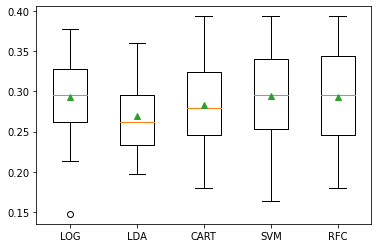

In [32]:
from sklearn.pipeline import Pipeline
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt

# get a list of models to evaluate
def get_models():
    models = dict()
    # Logistic Regression
    rfe = RFE(log_model, 10)
    model = DecisionTreeClassifier()
    models['LOG'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Linear Discriminant Analysis
    rfe = RFE(lda_model, 10)
    model = DecisionTreeClassifier()
    models['LDA'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Classification & Regression Trees
    rfe = RFE(cart_model, 10)
    model = DecisionTreeClassifier()
    models['CART'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Support Vector Machines
    rfe = RFE(svm_model, 10)
    model = DecisionTreeClassifier()
    models['SVM'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Random Forest Classifier
    rfe = RFE(rfc_model, 10)
    model = DecisionTreeClassifier()
    models['RFC'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [33]:
# Test 2: New Dataset, Robust and Non-Robust

In [34]:
# Pre-parse the dataset
data = RobustFrailMCIpreprocess("rawfile_blood.csv")

robust          368
prefrail_mci    268
prefrail        250
mci             142
frail_mci        86
frail             9
Name: condition, dtype: int64

####################################################################
Number of Rows of Dataframe:
1123
Number of Columns of Dataframe:
59

####################################################################
Threshold for number of NULLs in a column: 0.1095
Number of Columns before Parsing for Too Many NULLs in a column:
59
Number of Columns after Parsing for Too Many NULLs in a column:
51

Columns Removed:
B1_b5
B4_a1
B4_a3
B4_a4
B4_a6
B4_b1
B4_b3
B5_a1

####################################################################
Number of Columns after dropping B1_b4, B2_c3, B4_b2 for inconsistent data types:
48

####################################################################
Number of Rows before Parsing NULLs in data:
1123
Number of Rows after Parsing NULLs in data:
1015


In [35]:
for i in range(0, len(data)):
	if data.at[i, 'condition'] == 'frail':
		data.at[i, 'condition'] = 'non-robust'
	elif data.at[i, 'condition'] == 'frail_mci':
		data.at[i, 'condition'] = 'non-robust'
	elif data.at[i, 'condition'] == 'mci':
		data.at[i, 'condition'] = 'non-robust'
	elif data.at[i, 'condition'] == 'prefrail_mci':
		data.at[i, 'condition'] = 'non-robust'
	elif data.at[i, 'condition'] == 'prefrail':
		data.at[i, 'condition'] = 'non-robust'
	elif data.at[i, 'condition'] == 'robust':
		data.at[i, 'condition'] = 'robust'

In [36]:
data.head()

,mtag,condition,A1_1,A1_2,A2_1,A3_1,B1_a,B1_a1,B1_a2,B1_a3,...,B2_d6,B2_d7,B2_d8,B2_d9,B3,B4_a2,B4_a5,B5_a2,B5_a3,B6
0,ME02646,non-robust,196,32.7,24,46.5,121,3.93,0.37,95,...,7,12,13,6,0.2,6.0,1.011,1.14,4.1,5.9
1,ME03109,non-robust,200,28.2,23,55.6,142,4.82,0.42,87,...,7,20,17,26,3.1,5.0,1.011,3.25,4.6,8.5
2,ME06997,non-robust,441,44.4,20,76.8,105,4.54,0.41,90,...,5,16,19,15,1.4,7.0,1.023,2.14,4.0,6.4
3,ME07149,non-robust,265,20.7,16,47.2,122,4.53,0.39,86,...,8,24,19,21,2.1,5.5,1.012,1.06,4.7,6.1
4,ME07700,non-robust,425,13.5,14,31.3,124,4.44,0.38,85,...,6,20,23,23,6.0,5.5,1.013,1.95,3.8,5.8


In [37]:
data.tail()

,mtag,condition,A1_1,A1_2,A2_1,A3_1,B1_a,B1_a1,B1_a2,B1_a3,...,B2_d6,B2_d7,B2_d8,B2_d9,B3,B4_a2,B4_a5,B5_a2,B5_a3,B6
1010,MV00454,robust,220,24.6,19,67.5,138,4.66,0.42,91,...,20,10,17,8,6.6,7.0,1.015,1.29,4.5,6.2
1011,MV00456,robust,334,20.1,18,51.0,139,4.63,0.42,91,...,16,22,35,40,1.0,6.0,1.015,1.88,3.9,5.6
1012,MV00460,robust,418,54.4,17,61.0,122,4.18,0.38,90,...,19,20,23,15,0.4,6.5,1.005,3.58,4.0,5.6
1013,MV00502,robust,393,38.2,18,43.1,136,4.57,0.43,94,...,13,11,22,23,0.7,7.0,1.009,0.92,4.1,6.0
1014,MV00510,robust,371,23.2,24,55.9,127,4.41,0.40,90,...,13,14,16,12,7.5,8.0,1.017,2.45,4.5,6.2


In [38]:
c = data['condition'].value_counts()
condition = c.index
c

non-robust    672
robust        343
Name: condition, dtype: int64

In [39]:
for i in range(len(condition)):
    data['condition'].replace(condition[i], i, inplace = True)

data.head()

,mtag,condition,A1_1,A1_2,A2_1,A3_1,B1_a,B1_a1,B1_a2,B1_a3,...,B2_d6,B2_d7,B2_d8,B2_d9,B3,B4_a2,B4_a5,B5_a2,B5_a3,B6
0,ME02646,0,196,32.7,24,46.5,121,3.93,0.37,95,...,7,12,13,6,0.2,6.0,1.011,1.14,4.1,5.9
1,ME03109,0,200,28.2,23,55.6,142,4.82,0.42,87,...,7,20,17,26,3.1,5.0,1.011,3.25,4.6,8.5
2,ME06997,0,441,44.4,20,76.8,105,4.54,0.41,90,...,5,16,19,15,1.4,7.0,1.023,2.14,4.0,6.4
3,ME07149,0,265,20.7,16,47.2,122,4.53,0.39,86,...,8,24,19,21,2.1,5.5,1.012,1.06,4.7,6.1
4,ME07700,0,425,13.5,14,31.3,124,4.44,0.38,85,...,6,20,23,23,6.0,5.5,1.013,1.95,3.8,5.8


In [40]:
data.tail()

,mtag,condition,A1_1,A1_2,A2_1,A3_1,B1_a,B1_a1,B1_a2,B1_a3,...,B2_d6,B2_d7,B2_d8,B2_d9,B3,B4_a2,B4_a5,B5_a2,B5_a3,B6
1010,MV00454,1,220,24.6,19,67.5,138,4.66,0.42,91,...,20,10,17,8,6.6,7.0,1.015,1.29,4.5,6.2
1011,MV00456,1,334,20.1,18,51.0,139,4.63,0.42,91,...,16,22,35,40,1.0,6.0,1.015,1.88,3.9,5.6
1012,MV00460,1,418,54.4,17,61.0,122,4.18,0.38,90,...,19,20,23,15,0.4,6.5,1.005,3.58,4.0,5.6
1013,MV00502,1,393,38.2,18,43.1,136,4.57,0.43,94,...,13,11,22,23,0.7,7.0,1.009,0.92,4.1,6.0
1014,MV00510,1,371,23.2,24,55.9,127,4.41,0.40,90,...,13,14,16,12,7.5,8.0,1.017,2.45,4.5,6.2


In [41]:
y = data['condition']

features = ['A1_1', 'A1_2', 'A2_1', 'A3_1', 'B1_a', 'B1_a1', 'B1_a2',
       'B1_a3', 'B1_a4', 'B1_a5', 'B1_a6', 'B1_b', 'B1_b1', 'B1_b2', 'B1_b3',
       'B1_c', 'B1_d', 'B2_a1', 'B2_a2', 'B2_a3', 'B2_a4', 'B2_a5', 'B2_b1',
       'B2_b2', 'B2_b3', 'B2_c1', 'B2_c2', 'B2_c4', 'B2_c5', 'B2_c6', 'B2_c7',
       'B2_d1', 'B2_d2', 'B2_d3', 'B2_d4', 'B2_d5', 'B2_d6', 'B2_d7', 'B2_d8',
       'B2_d9', 'B3', 'B4_a2', 'B4_a5', 'B5_a2', 'B5_a3', 'B6']
X_old = data[features]

X = X_old
X = StandardScaler().fit_transform(X_old)
X = MinMaxScaler().fit_transform(X_old)

In [42]:
# Summarise the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 672, 1: 343})


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

# Logistic Regression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
print("Logistic Regression:", log_model.score(X_test, y_test).round(3))

# Linear Discriminant Analysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
print("Linear Discriminant Analysis:", lda_model.score(X_test, y_test).round(3))

# K-Nearest Neigbors

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
print("K-Nearest Neigbors:", knn_model.score(X_test, y_test).round(3))

# Classification and Regression Trees

cart_model = DecisionTreeClassifier()
cart_model.fit(X_train, y_train)
print("Classification and Regression Trees:", cart_model.score(X_test, y_test).round(3))

# Gaussian Naive Bayes

gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
print("Gaussian Naive Bayes:", gnb_model.score(X_test, y_test).round(3))

# Support Vector Machines

svm_model = SVC(kernel='linear', gamma = 'auto', probability=True)
svm_model.fit(X_train, y_train)
print("Support Vector Machines:", svm_model.score(X_test, y_test).round(3))

# Random Forest Classifier

rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)
print("Random Forest Classifier:", rfc_model.score(X_test, y_test).round(3))

Logistic Regression: 0.665
Linear Discriminant Analysis: 0.655
K-Nearest Neigbors: 0.599
Classification and Regression Trees: 0.559
Gaussian Naive Bayes: 0.51
Support Vector Machines: 0.638
Random Forest Classifier: 0.645


In [44]:
# Calculating for Logistic Regression
log_pred = log_model.predict(X_test)

print('Performance Metrics for Logistic Regression:\n')
print(accuracy_score(y_test, log_pred).round(5), '\n')
print(confusion_matrix(y_test, log_pred), '\n')
print(classification_report(y_test, log_pred))

Performance Metrics for Logistic Regression:

0.66502 

[[249  10]
 [126  21]] 

              precision    recall  f1-score   support

           0       0.66      0.96      0.79       259
           1       0.68      0.14      0.24       147

    accuracy                           0.67       406
   macro avg       0.67      0.55      0.51       406
weighted avg       0.67      0.67      0.59       406



In [45]:
# Calculating for LDA
lda_pred = lda_model.predict(X_test)

print('Performance Metrics for LDA:\n')
print(accuracy_score(y_test, lda_pred).round(5), '\n')
print(confusion_matrix(y_test, lda_pred), '\n')
print(classification_report(y_test, lda_pred))

Performance Metrics for LDA:

0.65517 

[[224  35]
 [105  42]] 

              precision    recall  f1-score   support

           0       0.68      0.86      0.76       259
           1       0.55      0.29      0.37       147

    accuracy                           0.66       406
   macro avg       0.61      0.58      0.57       406
weighted avg       0.63      0.66      0.62       406



In [46]:
# Calculating for kNN
knn_pred = knn_model.predict(X_test)

print('Performance Metrics for KNN:\n')
print(accuracy_score(y_test, knn_pred).round(5), '\n')
print(confusion_matrix(y_test, knn_pred), '\n')
print(classification_report(y_test, knn_pred))

Performance Metrics for KNN:

0.59852 

[[192  67]
 [ 96  51]] 

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       259
           1       0.43      0.35      0.38       147

    accuracy                           0.60       406
   macro avg       0.55      0.54      0.54       406
weighted avg       0.58      0.60      0.59       406



In [47]:
# Calculating for CART
cart_pred = cart_model.predict(X_test)

print('Performance Metrics for CART:\n')
print(accuracy_score(y_test, cart_pred).round(5), '\n')
print(confusion_matrix(y_test, cart_pred), '\n')
print(classification_report(y_test, cart_pred))

Performance Metrics for CART:

0.55911 

[[171  88]
 [ 91  56]] 

              precision    recall  f1-score   support

           0       0.65      0.66      0.66       259
           1       0.39      0.38      0.38       147

    accuracy                           0.56       406
   macro avg       0.52      0.52      0.52       406
weighted avg       0.56      0.56      0.56       406



In [48]:
# Calculating for GNB
gnb_pred = log_model.predict(X_test)

print('Performance Metrics for GNB:\n')
print(accuracy_score(y_test, gnb_pred).round(5), '\n')
print(confusion_matrix(y_test, gnb_pred), '\n')
print(classification_report(y_test, gnb_pred))

Performance Metrics for GNB:

0.66502 

[[249  10]
 [126  21]] 

              precision    recall  f1-score   support

           0       0.66      0.96      0.79       259
           1       0.68      0.14      0.24       147

    accuracy                           0.67       406
   macro avg       0.67      0.55      0.51       406
weighted avg       0.67      0.67      0.59       406



In [49]:
# Calculating for Support Vector Machine
svm_pred = svm_model.predict(X_test)

print('Performance Metrics for SVM:\n')
print(accuracy_score(y_test, svm_pred).round(5), '\n')
print(confusion_matrix(y_test, svm_pred), '\n')
print(classification_report(y_test, svm_pred))

Performance Metrics for SVM:

0.63793 

[[259   0]
 [147   0]] 

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       259
           1       0.00      0.00      0.00       147

    accuracy                           0.64       406
   macro avg       0.32      0.50      0.39       406
weighted avg       0.41      0.64      0.50       406



C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
# Calculating for Random Forest Classifier
rfc_pred = rfc_model.predict(X_test)

print('Performance Metrics for RFC:\n')
print(accuracy_score(y_test, rfc_pred).round(5), '\n')
print(confusion_matrix(y_test, rfc_pred), '\n')
print(classification_report(y_test, rfc_pred))

Performance Metrics for RFC:

0.64532 

[[246  13]
 [131  16]] 

              precision    recall  f1-score   support

           0       0.65      0.95      0.77       259
           1       0.55      0.11      0.18       147

    accuracy                           0.65       406
   macro avg       0.60      0.53      0.48       406
weighted avg       0.62      0.65      0.56       406



In [51]:
# Logistic Regression

# predict probabilities
log_probs = log_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
log_probs = log_probs[:, 1]

# Linear Discriminant Analysis

# predict probabilities
lda_probs = lda_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lda_probs = lda_probs[:, 1]

# K-Nearest Neigbors

# predict probabilities
knn_probs = knn_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
knn_probs = knn_probs[:, 1]

# Classification and Regression Trees

# predict probabilities
cart_probs = cart_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
cart_probs = cart_probs[:, 1]

# Gaussian Naive Bayes

# predict probabilities
gnb_probs = gnb_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
gnb_probs = gnb_probs[:, 1]

# Support Vector Machines

# predict probabilities
svm_probs = svm_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
svm_probs = svm_probs[:, 1]

# Random Forest Classifier

# predict probabilities
rfc_probs = rfc_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
rfc_probs = rfc_probs[:, 1]

Logistic Regression:
AUC:  0.6672707693115856
Best Threshold=0.337979, G-Mean=0.646


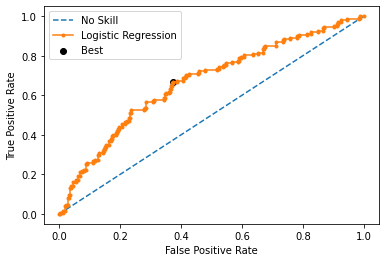

In [52]:
# Logistic Regression

# calculate roc curves
log_fpr, log_tpr, log_thresholds = roc_curve(y_test, log_probs)
# calculate the g-mean for each threshold
log_gmeans = np.sqrt(log_tpr * (1-log_fpr))
# locate the index of the largest g-mean
log_ix = np.argmax(log_gmeans)
print("Logistic Regression:")
print("AUC: ", auc(log_fpr, log_tpr))
print('Best Threshold=%f, G-Mean=%.3f' % (log_thresholds[log_ix], log_gmeans[log_ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(log_fpr, log_tpr, marker='.', label='Logistic Regression')
plt.scatter(log_fpr[log_ix], log_tpr[log_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Linear Discriminant Analysis:
AUC:  0.6451816247734614
Best Threshold=0.320565, G-Mean=0.617


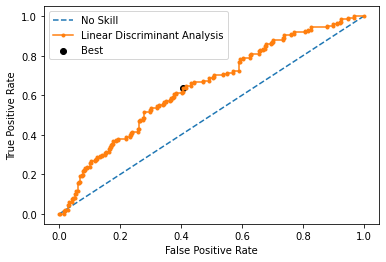

In [53]:
# Linear Discriminant Analysis

# calculate roc curves
lda_fpr, lda_tpr, lda_thresholds = roc_curve(y_test, lda_probs)
# calculate the g-mean for each threshold
lda_gmeans = np.sqrt(lda_tpr * (1-lda_fpr))
# locate the index of the largest g-mean
lda_ix = np.argmax(lda_gmeans)
print("Linear Discriminant Analysis:")
print("AUC: ", auc(lda_fpr, lda_tpr))
print('Best Threshold=%f, G-Mean=%.3f' % (lda_thresholds[lda_ix], lda_gmeans[lda_ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(lda_fpr, lda_tpr, marker='.', label='Linear Discriminant Analysis')
plt.scatter(lda_fpr[lda_ix], lda_tpr[lda_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

K-Nearest Neighbor:
AUC:  0.5984949964541801
Best Threshold=0.400000, G-Mean=0.580


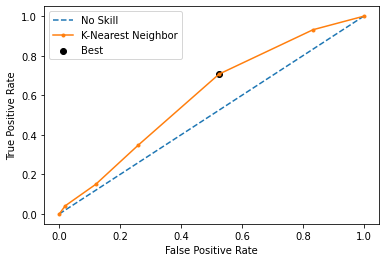

In [54]:
# K-Nearest Neighbor

# calculate roc curves
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_probs)
# calculate the g-mean for each threshold
knn_gmeans = np.sqrt(knn_tpr * (1-knn_fpr))
# locate the index of the largest g-mean
knn_ix = np.argmax(knn_gmeans)
print("K-Nearest Neighbor:")
print("AUC: ", auc(knn_fpr, knn_tpr))
print('Best Threshold=%f, G-Mean=%.3f' % (knn_thresholds[knn_ix], knn_gmeans[knn_ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(knn_fpr, knn_tpr, marker='.', label='K-Nearest Neighbor')
plt.scatter(knn_fpr[knn_ix], knn_tpr[knn_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Classification and Regression Tree:
AUC:  0.5205920205920206
Best Threshold=1.000000, G-Mean=0.502


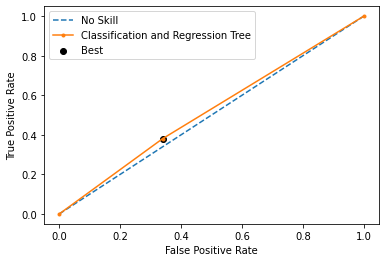

In [55]:
# Classification and Regression Tree

# calculate roc curves
cart_fpr, cart_tpr, cart_thresholds = roc_curve(y_test, cart_probs)
# calculate the g-mean for each threshold
cart_gmeans = np.sqrt(cart_tpr * (1-cart_fpr))
# locate the index of the largest g-mean
cart_ix = np.argmax(cart_gmeans)
print("Classification and Regression Tree:")
print("AUC: ", auc(cart_fpr, cart_tpr))
print('Best Threshold=%f, G-Mean=%.3f' % (cart_thresholds[cart_ix], cart_gmeans[cart_ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(cart_fpr, cart_tpr, marker='.', label='Classification and Regression Tree')
plt.scatter(cart_fpr[cart_ix], cart_tpr[cart_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Gaussian Naive Bayes:
AUC:  0.641031702256192
Best Threshold=0.973567, G-Mean=0.627


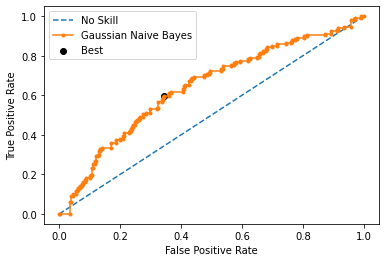

In [56]:
# Gaussian Naive Bayes

# calculate roc curves
gnb_fpr, gnb_tpr, gnb_thresholds = roc_curve(y_test, gnb_probs)
# calculate the g-mean for each threshold
gnb_gmeans = np.sqrt(gnb_tpr * (1-gnb_fpr))
# locate the index of the largest g-mean
gnb_ix = np.argmax(gnb_gmeans)
print("Gaussian Naive Bayes:")
print("AUC: ", auc(gnb_fpr, gnb_tpr))
print('Best Threshold=%f, G-Mean=%.3f' % (gnb_thresholds[gnb_ix], gnb_gmeans[gnb_ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(gnb_fpr, gnb_tpr, marker='.', label='Gaussian Naive Bayes')
plt.scatter(gnb_fpr[gnb_ix], gnb_tpr[gnb_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Support Vector Machines:
AUC:  0.6309720799516718
Best Threshold=0.339667, G-Mean=0.598


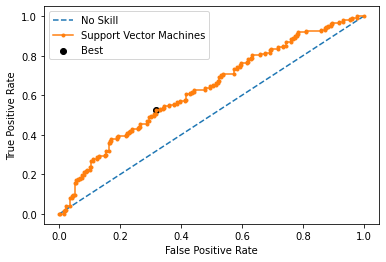

In [57]:
# Support Vector Machines

# calculate roc curves
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_probs)
# calculate the g-mean for each threshold
svm_gmeans = np.sqrt(svm_tpr * (1-svm_fpr))
# locate the index of the largest g-mean
svm_ix = np.argmax(svm_gmeans)
print("Support Vector Machines:")
print("AUC: ", auc(svm_fpr, svm_tpr))
print('Best Threshold=%f, G-Mean=%.3f' % (svm_thresholds[svm_ix], svm_gmeans[svm_ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(svm_fpr, svm_tpr, marker='.', label='Support Vector Machines')
plt.scatter(svm_fpr[svm_ix], svm_tpr[svm_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Random Forest Classifier:
AUC:  0.6600609355711397
Best Threshold=0.340000, G-Mean=0.636


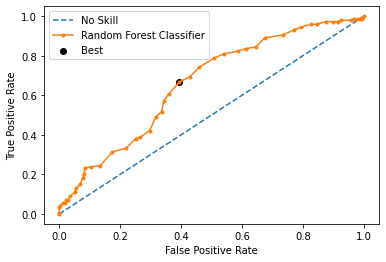

In [58]:
# Random Forest Classifier

# calculate roc curves
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_test, rfc_probs)
# calculate the g-mean for each threshold
rfc_gmeans = np.sqrt(rfc_tpr * (1-rfc_fpr))
# locate the index of the largest g-mean
rfc_ix = np.argmax(rfc_gmeans)
print("Random Forest Classifier:")
print("AUC: ", auc(rfc_fpr, rfc_tpr))
print('Best Threshold=%f, G-Mean=%.3f' % (rfc_thresholds[rfc_ix], rfc_gmeans[rfc_ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Random Forest Classifier')
plt.scatter(rfc_fpr[rfc_ix], rfc_tpr[rfc_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [59]:
# Logistic Regression

log_model = LogisticRegression()
log_model.fit(X, y)
scores = cross_val_score(log_model, X, y, cv=5)
print("Logistic Regression: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# Linear Discriminant Analysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X, y)
scores = cross_val_score(lda_model, X, y, cv=5)
print("Linear Discriminant Analysis: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# K-Nearest Neigbors

knn_model = KNeighborsClassifier()
knn_model.fit(X, y)
scores = cross_val_score(knn_model, X, y, cv=5)
print("K-Nearest Neighbors: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# Classification and Regression Trees

cart_model = DecisionTreeClassifier()
cart_model.fit(X, y)
scores = cross_val_score(cart_model, X, y, cv=5)
print("Classification and Regression Trees: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# Gaussian Naive Bayes

gnb_model = GaussianNB()
gnb_model.fit(X, y)
scores = cross_val_score(gnb_model, X, y, cv=5)
print("Gaussian Naive Bayes: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# Support Vector Machines

svm_model = SVC(kernel='linear', gamma = 'auto', probability=True)
svm_model.fit(X, y)
scores = cross_val_score(svm_model, X, y, cv=5)
print("Support Vector Machines: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# Random Forest Classifier

rfc_model = RandomForestClassifier()
rfc_model.fit(X, y)
scores = cross_val_score(rfc_model, X, y, cv=5)
print("Random Forest Classifier: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

Logistic Regression: 0.657 accuracy with a standard deviation of 0.044
Linear Discriminant Analysis: 0.656 accuracy with a standard deviation of 0.048
K-Nearest Neighbors: 0.603 accuracy with a standard deviation of 0.043
Classification and Regression Trees: 0.576 accuracy with a standard deviation of 0.051
Gaussian Naive Bayes: 0.494 accuracy with a standard deviation of 0.060
Support Vector Machines: 0.649 accuracy with a standard deviation of 0.027
Random Forest Classifier: 0.646 accuracy with a standard deviation of 0.023


In [60]:
# Logistic Regression
scores = cross_val_score(log_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.68      0.98      0.80       135
           1       0.70      0.10      0.18        68

    accuracy                           0.68       203
   macro avg       0.69      0.54      0.49       203
weighted avg       0.69      0.68      0.60       203

              precision    recall  f1-score   support

           0       0.71      0.96      0.81       135
           1       0.71      0.22      0.34        68

    accuracy                           0.71       203
   macro avg       0.71      0.59      0.58       203
weighted avg       0.71      0.71      0.65       203

              precision    recall  f1-score   support

           0       0.67      0.98      0.80       134
           1       0.62      0.07      0.13        69

    accuracy                           0.67       203
   macro avg       0.65      0.53      0.46       203
weighted avg       0.66      0.67      0.57       203

              preci

In [61]:
# Linear Discriminant Analysis
scores = cross_val_score(lda_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.70      0.87      0.78       135
           1       0.51      0.26      0.35        68

    accuracy                           0.67       203
   macro avg       0.61      0.57      0.56       203
weighted avg       0.64      0.67      0.64       203

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       135
           1       0.61      0.32      0.42        68

    accuracy                           0.70       203
   macro avg       0.67      0.61      0.61       203
weighted avg       0.69      0.70      0.67       203

              precision    recall  f1-score   support

           0       0.69      0.96      0.80       134
           1       0.67      0.17      0.28        69

    accuracy                           0.69       203
   macro avg       0.68      0.56      0.54       203
weighted avg       0.68      0.69      0.62       203

              preci

In [62]:
# K-Nearest Neigbors
knn_model = KNeighborsClassifier()
knn_model.fit(X, y)
scores = cross_val_score(knn_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       135
           1       0.51      0.43      0.46        68

    accuracy                           0.67       203
   macro avg       0.62      0.61      0.61       203
weighted avg       0.66      0.67      0.66       203

              precision    recall  f1-score   support

           0       0.70      0.78      0.74       135
           1       0.43      0.34      0.38        68

    accuracy                           0.63       203
   macro avg       0.57      0.56      0.56       203
weighted avg       0.61      0.63      0.62       203

              precision    recall  f1-score   support

           0       0.66      0.75      0.70       134
           1       0.33      0.23      0.27        69

    accuracy                           0.58       203
   macro avg       0.49      0.49      0.49       203
weighted avg       0.54      0.58      0.56       203

              preci

In [63]:
# Classification and Regression Trees
cart_model = DecisionTreeClassifier()
cart_model.fit(X, y)
scores = cross_val_score(cart_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       135
           1       0.36      0.35      0.36        68

    accuracy                           0.57       203
   macro avg       0.52      0.52      0.52       203
weighted avg       0.57      0.57      0.57       203

              precision    recall  f1-score   support

           0       0.70      0.78      0.74       135
           1       0.44      0.35      0.39        68

    accuracy                           0.64       203
   macro avg       0.57      0.57      0.57       203
weighted avg       0.62      0.64      0.62       203

              precision    recall  f1-score   support

           0       0.73      0.74      0.74       134
           1       0.49      0.48      0.48        69

    accuracy                           0.65       203
   macro avg       0.61      0.61      0.61       203
weighted avg       0.65      0.65      0.65       203

              preci

In [64]:
# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X, y)
scores = cross_val_score(gnb_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.86      0.44      0.59       135
           1       0.44      0.85      0.58        68

    accuracy                           0.58       203
   macro avg       0.65      0.65      0.58       203
weighted avg       0.72      0.58      0.58       203

              precision    recall  f1-score   support

           0       0.75      0.27      0.39       135
           1       0.36      0.82      0.50        68

    accuracy                           0.45       203
   macro avg       0.56      0.55      0.45       203
weighted avg       0.62      0.45      0.43       203

              precision    recall  f1-score   support

           0       0.73      0.34      0.46       134
           1       0.37      0.75      0.50        69

    accuracy                           0.48       203
   macro avg       0.55      0.54      0.48       203
weighted avg       0.60      0.48      0.47       203

              preci

In [65]:
# Support Vector Machines
svm_model = SVC(kernel='linear', gamma = 'auto', probability=True)
svm_model.fit(X, y)
scores = cross_val_score(svm_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.67      1.00      0.80       135
           1       0.00      0.00      0.00        68

    accuracy                           0.67       203
   macro avg       0.33      0.50      0.40       203
weighted avg       0.44      0.67      0.53       203



C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.67      1.00      0.80       135
           1       0.00      0.00      0.00        68

    accuracy                           0.67       203
   macro avg       0.33      0.50      0.40       203
weighted avg       0.44      0.67      0.53       203



C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\env

              precision    recall  f1-score   support

           0       0.66      1.00      0.80       134
           1       0.00      0.00      0.00        69

    accuracy                           0.66       203
   macro avg       0.33      0.50      0.40       203
weighted avg       0.44      0.66      0.52       203



C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.66      1.00      0.80       134
           1       0.00      0.00      0.00        69

    accuracy                           0.66       203
   macro avg       0.33      0.50      0.40       203
weighted avg       0.44      0.66      0.52       203

              precision    recall  f1-score   support

           0       0.64      0.87      0.74       134
           1       0.22      0.07      0.11        69

    accuracy                           0.60       203
   macro avg       0.43      0.47      0.42       203
weighted avg       0.50      0.60      0.52       203

[0.66502463 0.66502463 0.66009852 0.66009852 0.59605911]


In [66]:
# Random Forest Classifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X, y)
scores = cross_val_score(rfc_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.68      0.98      0.80       135
           1       0.62      0.07      0.13        68

    accuracy                           0.67       203
   macro avg       0.65      0.53      0.47       203
weighted avg       0.66      0.67      0.58       203

              precision    recall  f1-score   support

           0       0.67      0.94      0.78       135
           1       0.38      0.07      0.12        68

    accuracy                           0.65       203
   macro avg       0.53      0.51      0.45       203
weighted avg       0.57      0.65      0.56       203

              precision    recall  f1-score   support

           0       0.68      0.96      0.80       134
           1       0.62      0.12      0.20        69

    accuracy                           0.67       203
   macro avg       0.65      0.54      0.50       203
weighted avg       0.66      0.67      0.59       203

              preci

In [67]:
# Logistic Regression

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(log_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
Platelets (/L),1
Serum Homocysteine (µmol/L),1
25-hydroxy Vitamin D (nmol/L),1
Monocytes (/L),1
RBC (/L),1
PCV (L/L),1
Free Tri-iodothyronine (FT3) (pmol/L),1
Chloride (mmol/L),1
Lymphocytes (/L),1
Neutrophils (/L),1


In [68]:
# Linear Discriminant Analysis

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(lda_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
Calcium (mmol/L),1
Corrected Calcium (mmol/L),1
Serum Homocysteine (µmol/L),1
Total Protein (g/L),1
Albumin (g/L),1
RBC (/L),1
Monocytes (/L),1
Neutrophils (/L),1
Globulin (g/L),1
White Cell Count (/L),1


In [69]:
# Classification and Regression Trees

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(cart_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
Platelets (/L),1
Serum Folate (nmol/L),1
Serum Homocysteine (µmol/L),1
25-hydroxy Vitamin D (nmol/L),1
Corrected Calcium (mmol/L),1
Thyroid Stimulating Hormone (mIU/L),1
Creatinine (umol/L),1
Total Cholesterol (mmol/L),1
C-Reactive Protein,1
Neutrophils (/L),1


In [70]:
# Support Vector Machines

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(svm_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
White Cell Count (/L),1
Serum Homocysteine (µmol/L),1
RBC (/L),1
Creatinine (umol/L),1
Globulin (g/L),1
Total Protein (g/L),1
Platelets (/L),1
Monocytes (/L),1
Neutrophils (/L),1
Lymphocytes (/L),1


In [71]:
# Random Forest Classifier

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(rfc_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
Vitamin B12 (pmol/L),1
Serum Folate (nmol/L),1
Thyroid Stimulating Hormone (mIU/L),1
25-hydroxy Vitamin D (nmol/L),1
Haemoglobin (g/L),1
RBC (/L),1
LDL Cholesterol (mmol/L),1
Platelets (/L),1
Alkaline Phosphatase (U/L),1
Neutrophils (/L),1


C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


>LOG 0.570 (0.058)
>LDA 0.582 (0.060)
>CART 0.553 (0.054)
>SVM 0.543 (0.051)
>RFC 0.576 (0.069)


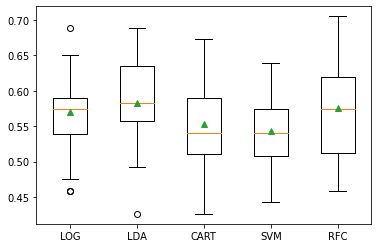

In [72]:
from sklearn.pipeline import Pipeline
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt

# get a list of models to evaluate
def get_models():
    models = dict()
    # Logistic Regression
    rfe = RFE(log_model, 10)
    model = DecisionTreeClassifier()
    models['LOG'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Linear Discriminant Analysis
    rfe = RFE(lda_model, 10)
    model = DecisionTreeClassifier()
    models['LDA'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Classification & Regression Trees
    rfe = RFE(cart_model, 10)
    model = DecisionTreeClassifier()
    models['CART'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Support Vector Machines
    rfe = RFE(svm_model, 10)
    model = DecisionTreeClassifier()
    models['SVM'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Random Forest Classifier
    rfe = RFE(rfc_model, 10)
    model = DecisionTreeClassifier()
    models['RFC'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [73]:
# Test 3: New Dataset, Robust and Non-Robust (76 samples)

In [74]:
# Pre-parse the dataset
data = RobustFrailMCIpreprocess("rawfile_final.csv")

robust       368
frail_mci     86
Name: condition, dtype: int64

####################################################################
Number of Rows of Dataframe:
454
Number of Columns of Dataframe:
59

####################################################################
Threshold for number of NULLs in a column: 0.1095
Number of Columns before Parsing for Too Many NULLs in a column:
59
Number of Columns after Parsing for Too Many NULLs in a column:
51

Columns Removed:
B1_b5
B4_a1
B4_a3
B4_a4
B4_a6
B4_b1
B4_b3
B5_a1

####################################################################
Number of Columns after dropping B1_b4, B2_c3, B4_b2 for inconsistent data types:
48

####################################################################
Number of Rows before Parsing NULLs in data:
454
Number of Rows after Parsing NULLs in data:
419


In [75]:
# Taking only Frail+MCI and Robust classes

df1 = data[data.condition == 'frail_mci']
df1 = df1.reset_index(drop=True)

df2 = data[data.condition == 'robust']
df2 = df2.reset_index(drop=True)

data = pd.concat([df1, df2], ignore_index=True)

In [76]:
data.head()

,mtag,condition,A1_1,A1_2,A2_1,A3_1,B1_a,B1_a1,B1_a2,B1_a3,...,B2_d6,B2_d7,B2_d8,B2_d9,B3,B4_a2,B4_a5,B5_a2,B5_a3,B6
0,ME01378,frail_mci,241,13.0,20,33.5,150,5.25,0.46,87,...,10,21,22,17,1.3,7.0,1.010,0.69,4.7,5.9
1,ME02832,frail_mci,444,43.8,16,87.0,134,4.65,0.40,85,...,10,14,20,15,13.4,6.0,1.005,1.29,4.5,5.8
2,ME02909,frail_mci,1476,54.5,16,57.0,119,3.80,0.36,94,...,18,17,35,21,0.2,7.5,1.012,1.90,4.1,5.8
3,ME02998,frail_mci,339,25.9,18,63.8,135,4.89,0.42,86,...,13,16,25,13,16.8,5.0,1.017,1.32,4.0,6.0
4,ME03061,frail_mci,287,23.8,20,95.5,146,5.18,0.44,85,...,18,22,25,24,1.4,7.5,1.006,2.94,4.6,6.1


In [77]:
data.tail()

,mtag,condition,A1_1,A1_2,A2_1,A3_1,B1_a,B1_a1,B1_a2,B1_a3,...,B2_d6,B2_d7,B2_d8,B2_d9,B3,B4_a2,B4_a5,B5_a2,B5_a3,B6
414,MV00454,robust,220,24.6,19,67.5,138,4.66,0.42,91,...,20,10,17,8,6.6,7.0,1.015,1.29,4.5,6.2
415,MV00456,robust,334,20.1,18,51.0,139,4.63,0.42,91,...,16,22,35,40,1.0,6.0,1.015,1.88,3.9,5.6
416,MV00460,robust,418,54.4,17,61.0,122,4.18,0.38,90,...,19,20,23,15,0.4,6.5,1.005,3.58,4.0,5.6
417,MV00502,robust,393,38.2,18,43.1,136,4.57,0.43,94,...,13,11,22,23,0.7,7.0,1.009,0.92,4.1,6.0
418,MV00510,robust,371,23.2,24,55.9,127,4.41,0.40,90,...,13,14,16,12,7.5,8.0,1.017,2.45,4.5,6.2


In [78]:
c = data['condition'].value_counts()
condition = c.index
c

robust       343
frail_mci     76
Name: condition, dtype: int64

In [79]:
for i in range(len(condition)):
    data['condition'].replace(condition[i], i, inplace = True)

data.head()

,mtag,condition,A1_1,A1_2,A2_1,A3_1,B1_a,B1_a1,B1_a2,B1_a3,...,B2_d6,B2_d7,B2_d8,B2_d9,B3,B4_a2,B4_a5,B5_a2,B5_a3,B6
0,ME01378,1,241,13.0,20,33.5,150,5.25,0.46,87,...,10,21,22,17,1.3,7.0,1.010,0.69,4.7,5.9
1,ME02832,1,444,43.8,16,87.0,134,4.65,0.40,85,...,10,14,20,15,13.4,6.0,1.005,1.29,4.5,5.8
2,ME02909,1,1476,54.5,16,57.0,119,3.80,0.36,94,...,18,17,35,21,0.2,7.5,1.012,1.90,4.1,5.8
3,ME02998,1,339,25.9,18,63.8,135,4.89,0.42,86,...,13,16,25,13,16.8,5.0,1.017,1.32,4.0,6.0
4,ME03061,1,287,23.8,20,95.5,146,5.18,0.44,85,...,18,22,25,24,1.4,7.5,1.006,2.94,4.6,6.1


In [80]:
data.tail()

,mtag,condition,A1_1,A1_2,A2_1,A3_1,B1_a,B1_a1,B1_a2,B1_a3,...,B2_d6,B2_d7,B2_d8,B2_d9,B3,B4_a2,B4_a5,B5_a2,B5_a3,B6
414,MV00454,0,220,24.6,19,67.5,138,4.66,0.42,91,...,20,10,17,8,6.6,7.0,1.015,1.29,4.5,6.2
415,MV00456,0,334,20.1,18,51.0,139,4.63,0.42,91,...,16,22,35,40,1.0,6.0,1.015,1.88,3.9,5.6
416,MV00460,0,418,54.4,17,61.0,122,4.18,0.38,90,...,19,20,23,15,0.4,6.5,1.005,3.58,4.0,5.6
417,MV00502,0,393,38.2,18,43.1,136,4.57,0.43,94,...,13,11,22,23,0.7,7.0,1.009,0.92,4.1,6.0
418,MV00510,0,371,23.2,24,55.9,127,4.41,0.40,90,...,13,14,16,12,7.5,8.0,1.017,2.45,4.5,6.2


In [81]:
y = data['condition']

features = ['A1_1', 'A1_2', 'A2_1', 'A3_1', 'B1_a', 'B1_a1', 'B1_a2',
       'B1_a3', 'B1_a4', 'B1_a5', 'B1_a6', 'B1_b', 'B1_b1', 'B1_b2', 'B1_b3',
       'B1_c', 'B1_d', 'B2_a1', 'B2_a2', 'B2_a3', 'B2_a4', 'B2_a5', 'B2_b1',
       'B2_b2', 'B2_b3', 'B2_c1', 'B2_c2', 'B2_c4', 'B2_c5', 'B2_c6', 'B2_c7',
       'B2_d1', 'B2_d2', 'B2_d3', 'B2_d4', 'B2_d5', 'B2_d6', 'B2_d7', 'B2_d8',
       'B2_d9', 'B3', 'B4_a2', 'B4_a5', 'B5_a2', 'B5_a3', 'B6']
X = data[features]

X = StandardScaler().fit_transform(X)
X = MinMaxScaler().fit_transform(X)

In [82]:
sampling_strategy = {0: 76, 1: 76}
undersample = RandomUnderSampler(sampling_strategy=sampling_strategy)

X, y = undersample.fit_resample(X, y)

# Transform the dataset using SMOTE
# sampling_strategy = {0: 100, 1: 100}
# oversample = SMOTE(sampling_strategy=sampling_strategy)
# X, y = oversample.fit_resample(X, y)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

# Logistic Regression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
print("Logistic Regression:", log_model.score(X_test, y_test).round(3))

# Linear Discriminant Analysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
print("Linear Discriminant Analysis:", lda_model.score(X_test, y_test).round(3))

# K-Nearest Neigbors

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
print("K-Nearest Neigbors:", knn_model.score(X_test, y_test).round(3))

# Classification and Regression Trees

cart_model = DecisionTreeClassifier()
cart_model.fit(X_train, y_train)
print("Classification and Regression Trees:", cart_model.score(X_test, y_test).round(3))

# Gaussian Naive Bayes

gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
print("Gaussian Naive Bayes:", gnb_model.score(X_test, y_test).round(3))

# Support Vector Machines

svm_model = SVC(kernel='linear', gamma = 'auto', probability=True)
svm_model.fit(X_train, y_train)
print("Support Vector Machines:", svm_model.score(X_test, y_test).round(3))

# Random Forest Classifier

rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)
print("Random Forest Classifier:", rfc_model.score(X_test, y_test).round(3))

Logistic Regression: 0.557
Linear Discriminant Analysis: 0.672
K-Nearest Neigbors: 0.541
Classification and Regression Trees: 0.623
Gaussian Naive Bayes: 0.705
Support Vector Machines: 0.639
Random Forest Classifier: 0.623


In [84]:
# Calculating for Logistic Regression
log_pred = log_model.predict(X_test)

print('Performance Metrics for Logistic Regression:\n')
print(accuracy_score(y_test, log_pred).round(5), '\n')
print(confusion_matrix(y_test, log_pred), '\n')
print(classification_report(y_test, log_pred))

Performance Metrics for Logistic Regression:

0.55738 

[[18 12]
 [15 16]] 

              precision    recall  f1-score   support

           0       0.55      0.60      0.57        30
           1       0.57      0.52      0.54        31

    accuracy                           0.56        61
   macro avg       0.56      0.56      0.56        61
weighted avg       0.56      0.56      0.56        61



In [85]:
# Calculating for LDA
lda_pred = lda_model.predict(X_test)

print('Performance Metrics for LDA:\n')
print(accuracy_score(y_test, lda_pred).round(5), '\n')
print(confusion_matrix(y_test, lda_pred), '\n')
print(classification_report(y_test, lda_pred))

Performance Metrics for LDA:

0.67213 

[[21  9]
 [11 20]] 

              precision    recall  f1-score   support

           0       0.66      0.70      0.68        30
           1       0.69      0.65      0.67        31

    accuracy                           0.67        61
   macro avg       0.67      0.67      0.67        61
weighted avg       0.67      0.67      0.67        61



In [86]:
# Calculating for kNN
knn_pred = knn_model.predict(X_test)

print('Performance Metrics for KNN:\n')
print(accuracy_score(y_test, knn_pred).round(5), '\n')
print(confusion_matrix(y_test, knn_pred), '\n')
print(classification_report(y_test, knn_pred))

Performance Metrics for KNN:

0.54098 

[[25  5]
 [23  8]] 

              precision    recall  f1-score   support

           0       0.52      0.83      0.64        30
           1       0.62      0.26      0.36        31

    accuracy                           0.54        61
   macro avg       0.57      0.55      0.50        61
weighted avg       0.57      0.54      0.50        61



In [87]:
# Calculating for CART
cart_pred = cart_model.predict(X_test)

print('Performance Metrics for CART:\n')
print(accuracy_score(y_test, cart_pred).round(5), '\n')
print(confusion_matrix(y_test, cart_pred), '\n')
print(classification_report(y_test, cart_pred))

Performance Metrics for CART:

0.62295 

[[18 12]
 [11 20]] 

              precision    recall  f1-score   support

           0       0.62      0.60      0.61        30
           1       0.62      0.65      0.63        31

    accuracy                           0.62        61
   macro avg       0.62      0.62      0.62        61
weighted avg       0.62      0.62      0.62        61



In [88]:
# Calculating for GNB
gnb_pred = log_model.predict(X_test)

print('Performance Metrics for GNB:\n')
print(accuracy_score(y_test, gnb_pred).round(5), '\n')
print(confusion_matrix(y_test, gnb_pred), '\n')
print(classification_report(y_test, gnb_pred))

Performance Metrics for GNB:

0.55738 

[[18 12]
 [15 16]] 

              precision    recall  f1-score   support

           0       0.55      0.60      0.57        30
           1       0.57      0.52      0.54        31

    accuracy                           0.56        61
   macro avg       0.56      0.56      0.56        61
weighted avg       0.56      0.56      0.56        61



In [89]:
# Calculating for Support Vector Machine
svm_pred = svm_model.predict(X_test)

print('Performance Metrics for SVM:\n')
print(accuracy_score(y_test, svm_pred).round(5), '\n')
print(confusion_matrix(y_test, svm_pred), '\n')
print(classification_report(y_test, svm_pred))

Performance Metrics for SVM:

0.63934 

[[20 10]
 [12 19]] 

              precision    recall  f1-score   support

           0       0.62      0.67      0.65        30
           1       0.66      0.61      0.63        31

    accuracy                           0.64        61
   macro avg       0.64      0.64      0.64        61
weighted avg       0.64      0.64      0.64        61



In [90]:
# Calculating for Random Forest Classifier
rfc_pred = rfc_model.predict(X_test)

print('Performance Metrics for RFC:\n')
print(accuracy_score(y_test, rfc_pred).round(5), '\n')
print(confusion_matrix(y_test, rfc_pred), '\n')
print(classification_report(y_test, rfc_pred))

Performance Metrics for RFC:

0.62295 

[[20 10]
 [13 18]] 

              precision    recall  f1-score   support

           0       0.61      0.67      0.63        30
           1       0.64      0.58      0.61        31

    accuracy                           0.62        61
   macro avg       0.62      0.62      0.62        61
weighted avg       0.62      0.62      0.62        61



In [91]:
# Logistic Regression

# predict probabilities
log_probs = log_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
log_probs = log_probs[:, 1]

# Linear Discriminant Analysis

# predict probabilities
lda_probs = lda_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lda_probs = lda_probs[:, 1]

# K-Nearest Neigbors

# predict probabilities
knn_probs = knn_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
knn_probs = knn_probs[:, 1]

# Classification and Regression Trees

# predict probabilities
cart_probs = cart_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
cart_probs = cart_probs[:, 1]

# Gaussian Naive Bayes

# predict probabilities
gnb_probs = gnb_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
gnb_probs = gnb_probs[:, 1]

# Support Vector Machines

# predict probabilities
svm_probs = svm_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
svm_probs = svm_probs[:, 1]

# Random Forest Classifier

# predict probabilities
rfc_probs = rfc_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
rfc_probs = rfc_probs[:, 1]

Logistic Regression:
AUC:  0.6989247311827957
Best Threshold=0.387062, G-Mean=0.703


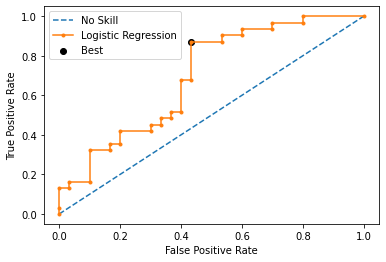

In [92]:
# Logistic Regression

# calculate roc curves
log_fpr, log_tpr, log_thresholds = roc_curve(y_test, log_probs)
# calculate the g-mean for each threshold
log_gmeans = np.sqrt(log_tpr * (1-log_fpr))
# locate the index of the largest g-mean
log_ix = np.argmax(log_gmeans)
print("Logistic Regression:")
print("AUC: ", auc(log_fpr, log_tpr))
print('Best Threshold=%f, G-Mean=%.3f' % (log_thresholds[log_ix], log_gmeans[log_ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(log_fpr, log_tpr, marker='.', label='Logistic Regression')
plt.scatter(log_fpr[log_ix], log_tpr[log_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Linear Discriminant Analysis:
AUC:  0.7408602150537634
Best Threshold=0.188270, G-Mean=0.748


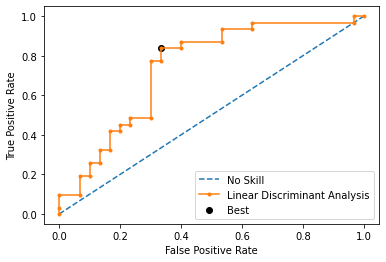

In [93]:
# Linear Discriminant Analysis

# calculate roc curves
lda_fpr, lda_tpr, lda_thresholds = roc_curve(y_test, lda_probs)
# calculate the g-mean for each threshold
lda_gmeans = np.sqrt(lda_tpr * (1-lda_fpr))
# locate the index of the largest g-mean
lda_ix = np.argmax(lda_gmeans)
print("Linear Discriminant Analysis:")
print("AUC: ", auc(lda_fpr, lda_tpr))
print('Best Threshold=%f, G-Mean=%.3f' % (lda_thresholds[lda_ix], lda_gmeans[lda_ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(lda_fpr, lda_tpr, marker='.', label='Linear Discriminant Analysis')
plt.scatter(lda_fpr[lda_ix], lda_tpr[lda_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

K-Nearest Neighbor:
AUC:  0.6537634408602151
Best Threshold=0.200000, G-Mean=0.603


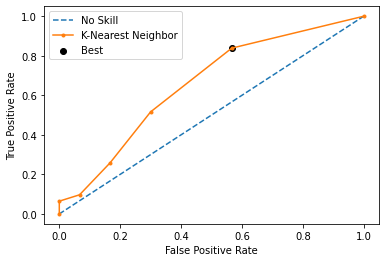

In [94]:
# K-Nearest Neighbor

# calculate roc curves
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_probs)
# calculate the g-mean for each threshold
knn_gmeans = np.sqrt(knn_tpr * (1-knn_fpr))
# locate the index of the largest g-mean
knn_ix = np.argmax(knn_gmeans)
print("K-Nearest Neighbor:")
print("AUC: ", auc(knn_fpr, knn_tpr))
print('Best Threshold=%f, G-Mean=%.3f' % (knn_thresholds[knn_ix], knn_gmeans[knn_ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(knn_fpr, knn_tpr, marker='.', label='K-Nearest Neighbor')
plt.scatter(knn_fpr[knn_ix], knn_tpr[knn_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Classification and Regression Tree:
AUC:  0.6225806451612903
Best Threshold=1.000000, G-Mean=0.622


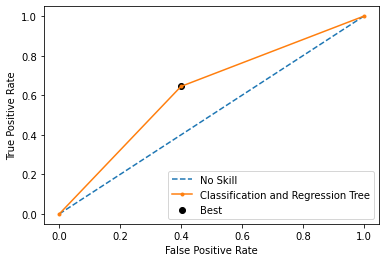

In [95]:
# Classification and Regression Tree

# calculate roc curves
cart_fpr, cart_tpr, cart_thresholds = roc_curve(y_test, cart_probs)
# calculate the g-mean for each threshold
cart_gmeans = np.sqrt(cart_tpr * (1-cart_fpr))
# locate the index of the largest g-mean
cart_ix = np.argmax(cart_gmeans)
print("Classification and Regression Tree:")
print("AUC: ", auc(cart_fpr, cart_tpr))
print('Best Threshold=%f, G-Mean=%.3f' % (cart_thresholds[cart_ix], cart_gmeans[cart_ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(cart_fpr, cart_tpr, marker='.', label='Classification and Regression Tree')
plt.scatter(cart_fpr[cart_ix], cart_tpr[cart_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Gaussian Naive Bayes:
AUC:  0.7634408602150538
Best Threshold=0.819648, G-Mean=0.705


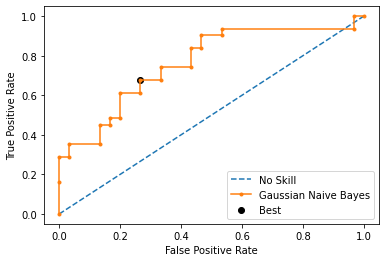

In [96]:
# Gaussian Naive Bayes

# calculate roc curves
gnb_fpr, gnb_tpr, gnb_thresholds = roc_curve(y_test, gnb_probs)
# calculate the g-mean for each threshold
gnb_gmeans = np.sqrt(gnb_tpr * (1-gnb_fpr))
# locate the index of the largest g-mean
gnb_ix = np.argmax(gnb_gmeans)
print("Gaussian Naive Bayes:")
print("AUC: ", auc(gnb_fpr, gnb_tpr))
print('Best Threshold=%f, G-Mean=%.3f' % (gnb_thresholds[gnb_ix], gnb_gmeans[gnb_ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(gnb_fpr, gnb_tpr, marker='.', label='Gaussian Naive Bayes')
plt.scatter(gnb_fpr[gnb_ix], gnb_tpr[gnb_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Support Vector Machines:
AUC:  0.7118279569892473
Best Threshold=0.507752, G-Mean=0.672


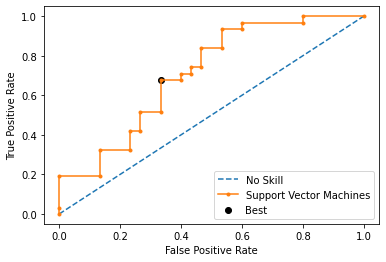

In [97]:
# Support Vector Machines

# calculate roc curves
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_probs)
# calculate the g-mean for each threshold
svm_gmeans = np.sqrt(svm_tpr * (1-svm_fpr))
# locate the index of the largest g-mean
svm_ix = np.argmax(svm_gmeans)
print("Support Vector Machines:")
print("AUC: ", auc(svm_fpr, svm_tpr))
print('Best Threshold=%f, G-Mean=%.3f' % (svm_thresholds[svm_ix], svm_gmeans[svm_ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(svm_fpr, svm_tpr, marker='.', label='Support Vector Machines')
plt.scatter(svm_fpr[svm_ix], svm_tpr[svm_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Random Forest Classifier:
AUC:  0.6973118279569893
Best Threshold=0.380000, G-Mean=0.669


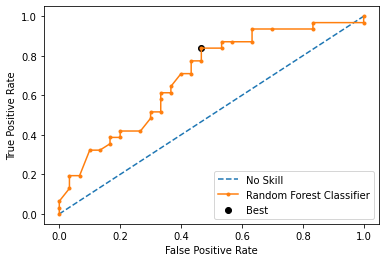

In [98]:
# Random Forest Classifier

# calculate roc curves
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_test, rfc_probs)
# calculate the g-mean for each threshold
rfc_gmeans = np.sqrt(rfc_tpr * (1-rfc_fpr))
# locate the index of the largest g-mean
rfc_ix = np.argmax(rfc_gmeans)
print("Random Forest Classifier:")
print("AUC: ", auc(rfc_fpr, rfc_tpr))
print('Best Threshold=%f, G-Mean=%.3f' % (rfc_thresholds[rfc_ix], rfc_gmeans[rfc_ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Random Forest Classifier')
plt.scatter(rfc_fpr[rfc_ix], rfc_tpr[rfc_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [99]:
# Logistic Regression

log_model = LogisticRegression()
log_model.fit(X, y)
scores = cross_val_score(log_model, X, y, cv=5)
print("Logistic Regression: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# Linear Discriminant Analysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X, y)
scores = cross_val_score(lda_model, X, y, cv=5)
print("Linear Discriminant Analysis: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# K-Nearest Neigbors

knn_model = KNeighborsClassifier()
knn_model.fit(X, y)
scores = cross_val_score(knn_model, X, y, cv=5)
print("K-Nearest Neighbors: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# Classification and Regression Trees

cart_model = DecisionTreeClassifier()
cart_model.fit(X, y)
scores = cross_val_score(cart_model, X, y, cv=5)
print("Classification and Regression Trees: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# Gaussian Naive Bayes

gnb_model = GaussianNB()
gnb_model.fit(X, y)
scores = cross_val_score(gnb_model, X, y, cv=5)
print("Gaussian Naive Bayes: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# Support Vector Machines

svm_model = SVC(kernel='linear', gamma = 'auto', probability=True)
svm_model.fit(X, y)
scores = cross_val_score(svm_model, X, y, cv=5)
print("Support Vector Machines: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# Random Forest Classifier

rfc_model = RandomForestClassifier()
rfc_model.fit(X, y)
scores = cross_val_score(rfc_model, X, y, cv=5)
print("Random Forest Classifier: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

Logistic Regression: 0.730 accuracy with a standard deviation of 0.066
Linear Discriminant Analysis: 0.645 accuracy with a standard deviation of 0.036
K-Nearest Neighbors: 0.671 accuracy with a standard deviation of 0.050
Classification and Regression Trees: 0.546 accuracy with a standard deviation of 0.062
Gaussian Naive Bayes: 0.750 accuracy with a standard deviation of 0.086
Support Vector Machines: 0.724 accuracy with a standard deviation of 0.054
Random Forest Classifier: 0.730 accuracy with a standard deviation of 0.096


In [100]:
# Logistic Regression
scores = cross_val_score(log_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.92      0.69      0.79        16
           1       0.74      0.93      0.82        15

    accuracy                           0.81        31
   macro avg       0.83      0.81      0.80        31
weighted avg       0.83      0.81      0.80        31

              precision    recall  f1-score   support

           0       0.62      0.67      0.65        15
           1       0.67      0.62      0.65        16

    accuracy                           0.65        31
   macro avg       0.65      0.65      0.65        31
weighted avg       0.65      0.65      0.65        31

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.80      0.80      0.80        15

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30

              preci

In [101]:
# Linear Discriminant Analysis
scores = cross_val_score(lda_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.69      0.56      0.62        16
           1       0.61      0.73      0.67        15

    accuracy                           0.65        31
   macro avg       0.65      0.65      0.64        31
weighted avg       0.65      0.65      0.64        31

              precision    recall  f1-score   support

           0       0.60      0.60      0.60        15
           1       0.62      0.62      0.62        16

    accuracy                           0.61        31
   macro avg       0.61      0.61      0.61        31
weighted avg       0.61      0.61      0.61        31

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        15
           1       0.75      0.60      0.67        15

    accuracy                           0.70        30
   macro avg       0.71      0.70      0.70        30
weighted avg       0.71      0.70      0.70        30

              preci

In [102]:
# K-Nearest Neigbors
knn_model = KNeighborsClassifier()
knn_model.fit(X, y)
scores = cross_val_score(knn_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.70      0.88      0.78        16
           1       0.82      0.60      0.69        15

    accuracy                           0.74        31
   macro avg       0.76      0.74      0.74        31
weighted avg       0.76      0.74      0.74        31

              precision    recall  f1-score   support

           0       0.62      0.87      0.72        15
           1       0.80      0.50      0.62        16

    accuracy                           0.68        31
   macro avg       0.71      0.68      0.67        31
weighted avg       0.71      0.68      0.67        31

              precision    recall  f1-score   support

           0       0.60      0.80      0.69        15
           1       0.70      0.47      0.56        15

    accuracy                           0.63        30
   macro avg       0.65      0.63      0.62        30
weighted avg       0.65      0.63      0.62        30

              preci

In [103]:
# Classification and Regression Trees
cart_model = DecisionTreeClassifier()
cart_model.fit(X, y)
scores = cross_val_score(cart_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.47      0.44      0.45        16
           1       0.44      0.47      0.45        15

    accuracy                           0.45        31
   macro avg       0.45      0.45      0.45        31
weighted avg       0.45      0.45      0.45        31

              precision    recall  f1-score   support

           0       0.60      0.40      0.48        15
           1       0.57      0.75      0.65        16

    accuracy                           0.58        31
   macro avg       0.59      0.57      0.56        31
weighted avg       0.59      0.58      0.57        31

              precision    recall  f1-score   support

           0       0.69      0.60      0.64        15
           1       0.65      0.73      0.69        15

    accuracy                           0.67        30
   macro avg       0.67      0.67      0.67        30
weighted avg       0.67      0.67      0.67        30

              preci

In [104]:
# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X, y)
scores = cross_val_score(gnb_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.77      0.67      0.71        15

    accuracy                           0.74        31
   macro avg       0.75      0.74      0.74        31
weighted avg       0.74      0.74      0.74        31

              precision    recall  f1-score   support

           0       0.70      0.93      0.80        15
           1       0.91      0.62      0.74        16

    accuracy                           0.77        31
   macro avg       0.80      0.78      0.77        31
weighted avg       0.81      0.77      0.77        31

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.82      0.93      0.87        15

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30

              preci

In [105]:
# Support Vector Machines
svm_model = SVC(kernel='linear', gamma = 'auto', probability=True)
svm_model.fit(X, y)
scores = cross_val_score(svm_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.91      0.62      0.74        16
           1       0.70      0.93      0.80        15

    accuracy                           0.77        31
   macro avg       0.80      0.78      0.77        31
weighted avg       0.81      0.77      0.77        31

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        15
           1       0.69      0.69      0.69        16

    accuracy                           0.68        31
   macro avg       0.68      0.68      0.68        31
weighted avg       0.68      0.68      0.68        31

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.85      0.73      0.79        15

    accuracy                           0.80        30
   macro avg       0.81      0.80      0.80        30
weighted avg       0.81      0.80      0.80        30

              preci

In [106]:
# Random Forest Classifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X, y)
scores = cross_val_score(rfc_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.83      0.62      0.71        16
           1       0.68      0.87      0.76        15

    accuracy                           0.74        31
   macro avg       0.76      0.75      0.74        31
weighted avg       0.76      0.74      0.74        31

              precision    recall  f1-score   support

           0       0.69      0.73      0.71        15
           1       0.73      0.69      0.71        16

    accuracy                           0.71        31
   macro avg       0.71      0.71      0.71        31
weighted avg       0.71      0.71      0.71        31

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        15
           1       0.83      0.67      0.74        15

    accuracy                           0.77        30
   macro avg       0.78      0.77      0.76        30
weighted avg       0.78      0.77      0.76        30

              preci

In [107]:
# Logistic Regression

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(log_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
Sodium (mmol/L),1
Total Bilirubin (µmol/L),1
Monocytes (/L),1
ALT,1
Thyroid Stimulating Hormone (mIU/L),1
PCV (L/L),1
Lymphocytes (/L),1
Serum Folate (nmol/L),1
Serum Homocysteine (µmol/L),1
RBC (/L),1


In [108]:
# Linear Discriminant Analysis

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(lda_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
Thyroid Stimulating Hormone (mIU/L),1
RBC (/L),1
Albumin (g/L),1
MCV (fL),1
MCH (pg),1
Globulin (g/L),1
C-Reactive Protein,1
Albumin/Globulin ratio,1
Total Bilirubin (µmol/L),1
Platelets (/L),1


In [109]:
# Classification and Regression Trees

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(cart_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
Total Bilirubin (µmol/L),1
Serum Folate (nmol/L),1
AST,1
C-Reactive Protein,1
Haemoglobin (g/L),1
Albumin/Globulin ratio,1
PCV (L/L),1
Globulin (g/L),1
Albumin (g/L),1
White Cell Count (/L),1


In [110]:
# Support Vector Machines

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(svm_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
ALT,1
Monocytes (/L),1
Total Bilirubin (µmol/L),1
Glucose (mmol/L),1
PCV (L/L),1
Chloride (mmol/L),1
Thyroid Stimulating Hormone (mIU/L),1
Serum Homocysteine (µmol/L),1
Serum Folate (nmol/L),1
RBC (/L),1


In [111]:
# Random Forest Classifier

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(rfc_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
Free Tri-iodothyronine (FT3) (pmol/L),1
Serum Folate (nmol/L),1
Serum Homocysteine (µmol/L),1
25-hydroxy Vitamin D (nmol/L),1
Haemoglobin (g/L),1
RBC (/L),1
PCV (L/L),1
Phosphate (mmol/L),1
ALT,1
White Cell Count (/L),1


C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


>LOG 0.685 (0.130)
>LDA 0.613 (0.193)
>CART 0.616 (0.147)
>SVM 0.707 (0.165)
>RFC 0.627 (0.147)


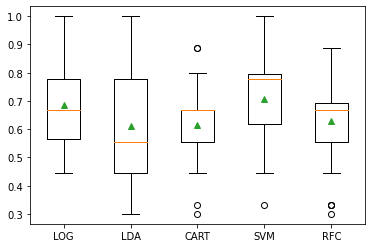

In [112]:
from sklearn.pipeline import Pipeline
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt

# get a list of models to evaluate
def get_models():
    models = dict()
    # Logistic Regression
    rfe = RFE(log_model, 10)
    model = DecisionTreeClassifier()
    models['LOG'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Linear Discriminant Analysis
    rfe = RFE(lda_model, 10)
    model = DecisionTreeClassifier()
    models['LDA'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Classification & Regression Trees
    rfe = RFE(cart_model, 10)
    model = DecisionTreeClassifier()
    models['CART'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Support Vector Machines
    rfe = RFE(svm_model, 10)
    model = DecisionTreeClassifier()
    models['SVM'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Random Forest Classifier
    rfe = RFE(rfc_model, 10)
    model = DecisionTreeClassifier()
    models['RFC'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [113]:
# Test 4: New Dataset, Robust and Non-Robust (343 samples)

In [114]:
# Pre-parse the dataset
data = RobustFrailMCIpreprocess("rawfile_final.csv")

robust       368
frail_mci     86
Name: condition, dtype: int64

####################################################################
Number of Rows of Dataframe:
454
Number of Columns of Dataframe:
59

####################################################################
Threshold for number of NULLs in a column: 0.1095
Number of Columns before Parsing for Too Many NULLs in a column:
59
Number of Columns after Parsing for Too Many NULLs in a column:
51

Columns Removed:
B1_b5
B4_a1
B4_a3
B4_a4
B4_a6
B4_b1
B4_b3
B5_a1

####################################################################
Number of Columns after dropping B1_b4, B2_c3, B4_b2 for inconsistent data types:
48

####################################################################
Number of Rows before Parsing NULLs in data:
454
Number of Rows after Parsing NULLs in data:
419


In [115]:
# Taking only Frail+MCI and Robust classes

df1 = data[data.condition == 'frail_mci']
df1 = df1.reset_index(drop=True)

df2 = data[data.condition == 'robust']
df2 = df2.reset_index(drop=True)

data = pd.concat([df1, df2], ignore_index=True)

In [116]:
data.head()

,mtag,condition,A1_1,A1_2,A2_1,A3_1,B1_a,B1_a1,B1_a2,B1_a3,...,B2_d6,B2_d7,B2_d8,B2_d9,B3,B4_a2,B4_a5,B5_a2,B5_a3,B6
0,ME01378,frail_mci,241,13.0,20,33.5,150,5.25,0.46,87,...,10,21,22,17,1.3,7.0,1.010,0.69,4.7,5.9
1,ME02832,frail_mci,444,43.8,16,87.0,134,4.65,0.40,85,...,10,14,20,15,13.4,6.0,1.005,1.29,4.5,5.8
2,ME02909,frail_mci,1476,54.5,16,57.0,119,3.80,0.36,94,...,18,17,35,21,0.2,7.5,1.012,1.90,4.1,5.8
3,ME02998,frail_mci,339,25.9,18,63.8,135,4.89,0.42,86,...,13,16,25,13,16.8,5.0,1.017,1.32,4.0,6.0
4,ME03061,frail_mci,287,23.8,20,95.5,146,5.18,0.44,85,...,18,22,25,24,1.4,7.5,1.006,2.94,4.6,6.1


In [117]:
data.tail()

,mtag,condition,A1_1,A1_2,A2_1,A3_1,B1_a,B1_a1,B1_a2,B1_a3,...,B2_d6,B2_d7,B2_d8,B2_d9,B3,B4_a2,B4_a5,B5_a2,B5_a3,B6
414,MV00454,robust,220,24.6,19,67.5,138,4.66,0.42,91,...,20,10,17,8,6.6,7.0,1.015,1.29,4.5,6.2
415,MV00456,robust,334,20.1,18,51.0,139,4.63,0.42,91,...,16,22,35,40,1.0,6.0,1.015,1.88,3.9,5.6
416,MV00460,robust,418,54.4,17,61.0,122,4.18,0.38,90,...,19,20,23,15,0.4,6.5,1.005,3.58,4.0,5.6
417,MV00502,robust,393,38.2,18,43.1,136,4.57,0.43,94,...,13,11,22,23,0.7,7.0,1.009,0.92,4.1,6.0
418,MV00510,robust,371,23.2,24,55.9,127,4.41,0.40,90,...,13,14,16,12,7.5,8.0,1.017,2.45,4.5,6.2


In [118]:
c = data['condition'].value_counts()
condition = c.index
c

robust       343
frail_mci     76
Name: condition, dtype: int64

In [119]:
for i in range(len(condition)):
    data['condition'].replace(condition[i], i, inplace = True)

data.head()

,mtag,condition,A1_1,A1_2,A2_1,A3_1,B1_a,B1_a1,B1_a2,B1_a3,...,B2_d6,B2_d7,B2_d8,B2_d9,B3,B4_a2,B4_a5,B5_a2,B5_a3,B6
0,ME01378,1,241,13.0,20,33.5,150,5.25,0.46,87,...,10,21,22,17,1.3,7.0,1.010,0.69,4.7,5.9
1,ME02832,1,444,43.8,16,87.0,134,4.65,0.40,85,...,10,14,20,15,13.4,6.0,1.005,1.29,4.5,5.8
2,ME02909,1,1476,54.5,16,57.0,119,3.80,0.36,94,...,18,17,35,21,0.2,7.5,1.012,1.90,4.1,5.8
3,ME02998,1,339,25.9,18,63.8,135,4.89,0.42,86,...,13,16,25,13,16.8,5.0,1.017,1.32,4.0,6.0
4,ME03061,1,287,23.8,20,95.5,146,5.18,0.44,85,...,18,22,25,24,1.4,7.5,1.006,2.94,4.6,6.1


In [120]:
data.tail()

,mtag,condition,A1_1,A1_2,A2_1,A3_1,B1_a,B1_a1,B1_a2,B1_a3,...,B2_d6,B2_d7,B2_d8,B2_d9,B3,B4_a2,B4_a5,B5_a2,B5_a3,B6
414,MV00454,0,220,24.6,19,67.5,138,4.66,0.42,91,...,20,10,17,8,6.6,7.0,1.015,1.29,4.5,6.2
415,MV00456,0,334,20.1,18,51.0,139,4.63,0.42,91,...,16,22,35,40,1.0,6.0,1.015,1.88,3.9,5.6
416,MV00460,0,418,54.4,17,61.0,122,4.18,0.38,90,...,19,20,23,15,0.4,6.5,1.005,3.58,4.0,5.6
417,MV00502,0,393,38.2,18,43.1,136,4.57,0.43,94,...,13,11,22,23,0.7,7.0,1.009,0.92,4.1,6.0
418,MV00510,0,371,23.2,24,55.9,127,4.41,0.40,90,...,13,14,16,12,7.5,8.0,1.017,2.45,4.5,6.2


In [121]:
y = data['condition']

features = ['A1_1', 'A1_2', 'A2_1', 'A3_1', 'B1_a', 'B1_a1', 'B1_a2',
       'B1_a3', 'B1_a4', 'B1_a5', 'B1_a6', 'B1_b', 'B1_b1', 'B1_b2', 'B1_b3',
       'B1_c', 'B1_d', 'B2_a1', 'B2_a2', 'B2_a3', 'B2_a4', 'B2_a5', 'B2_b1',
       'B2_b2', 'B2_b3', 'B2_c1', 'B2_c2', 'B2_c4', 'B2_c5', 'B2_c6', 'B2_c7',
       'B2_d1', 'B2_d2', 'B2_d3', 'B2_d4', 'B2_d5', 'B2_d6', 'B2_d7', 'B2_d8',
       'B2_d9', 'B3', 'B4_a2', 'B4_a5', 'B5_a2', 'B5_a3', 'B6']
X = data[features]

X = StandardScaler().fit_transform(X)
X = MinMaxScaler().fit_transform(X)

In [122]:
# sampling_strategy = {0: 76, 1: 76}
# undersample = RandomUnderSampler(sampling_strategy=sampling_strategy)

# X, y = undersample.fit_resample(X, y)

# Transform the dataset using SMOTE
# sampling_strategy = {0: 100, 1: 100}
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

# Logistic Regression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
print("Logistic Regression:", log_model.score(X_test, y_test).round(3))

# Linear Discriminant Analysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
print("Linear Discriminant Analysis:", lda_model.score(X_test, y_test).round(3))

# K-Nearest Neigbors

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
print("K-Nearest Neigbors:", knn_model.score(X_test, y_test).round(3))

# Classification and Regression Trees

cart_model = DecisionTreeClassifier()
cart_model.fit(X_train, y_train)
print("Classification and Regression Trees:", cart_model.score(X_test, y_test).round(3))

# Gaussian Naive Bayes

gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
print("Gaussian Naive Bayes:", gnb_model.score(X_test, y_test).round(3))

# Support Vector Machines

svm_model = SVC(kernel='linear', gamma = 'auto', probability=True)
svm_model.fit(X_train, y_train)
print("Support Vector Machines:", svm_model.score(X_test, y_test).round(3))

# Random Forest Classifier

rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)
print("Random Forest Classifier:", rfc_model.score(X_test, y_test).round(3))

Logistic Regression: 0.778
Linear Discriminant Analysis: 0.822
K-Nearest Neigbors: 0.756
Classification and Regression Trees: 0.771
Gaussian Naive Bayes: 0.764
Support Vector Machines: 0.793
Random Forest Classifier: 0.902


In [124]:
# Calculating for Logistic Regression
log_pred = log_model.predict(X_test)

print('Performance Metrics for Logistic Regression:\n')
print(accuracy_score(y_test, log_pred).round(5), '\n')
print(confusion_matrix(y_test, log_pred), '\n')
print(classification_report(y_test, log_pred))

Performance Metrics for Logistic Regression:

0.77818 

[[ 94  37]
 [ 24 120]] 

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       131
           1       0.76      0.83      0.80       144

    accuracy                           0.78       275
   macro avg       0.78      0.78      0.78       275
weighted avg       0.78      0.78      0.78       275



In [125]:
# Calculating for LDA
lda_pred = lda_model.predict(X_test)

print('Performance Metrics for LDA:\n')
print(accuracy_score(y_test, lda_pred).round(5), '\n')
print(confusion_matrix(y_test, lda_pred), '\n')
print(classification_report(y_test, lda_pred))

Performance Metrics for LDA:

0.82182 

[[100  31]
 [ 18 126]] 

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       131
           1       0.80      0.88      0.84       144

    accuracy                           0.82       275
   macro avg       0.83      0.82      0.82       275
weighted avg       0.82      0.82      0.82       275



In [126]:
# Calculating for kNN
knn_pred = knn_model.predict(X_test)

print('Performance Metrics for KNN:\n')
print(accuracy_score(y_test, knn_pred).round(5), '\n')
print(confusion_matrix(y_test, knn_pred), '\n')
print(classification_report(y_test, knn_pred))

Performance Metrics for KNN:

0.75636 

[[ 71  60]
 [  7 137]] 

              precision    recall  f1-score   support

           0       0.91      0.54      0.68       131
           1       0.70      0.95      0.80       144

    accuracy                           0.76       275
   macro avg       0.80      0.75      0.74       275
weighted avg       0.80      0.76      0.74       275



In [127]:
# Calculating for CART
cart_pred = cart_model.predict(X_test)

print('Performance Metrics for CART:\n')
print(accuracy_score(y_test, cart_pred).round(5), '\n')
print(confusion_matrix(y_test, cart_pred), '\n')
print(classification_report(y_test, cart_pred))

Performance Metrics for CART:

0.77091 

[[100  31]
 [ 32 112]] 

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       131
           1       0.78      0.78      0.78       144

    accuracy                           0.77       275
   macro avg       0.77      0.77      0.77       275
weighted avg       0.77      0.77      0.77       275



In [128]:
# Calculating for GNB
gnb_pred = log_model.predict(X_test)

print('Performance Metrics for GNB:\n')
print(accuracy_score(y_test, gnb_pred).round(5), '\n')
print(confusion_matrix(y_test, gnb_pred), '\n')
print(classification_report(y_test, gnb_pred))

Performance Metrics for GNB:

0.77818 

[[ 94  37]
 [ 24 120]] 

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       131
           1       0.76      0.83      0.80       144

    accuracy                           0.78       275
   macro avg       0.78      0.78      0.78       275
weighted avg       0.78      0.78      0.78       275



In [129]:
# Calculating for Support Vector Machine
svm_pred = svm_model.predict(X_test)

print('Performance Metrics for SVM:\n')
print(accuracy_score(y_test, svm_pred).round(5), '\n')
print(confusion_matrix(y_test, svm_pred), '\n')
print(classification_report(y_test, svm_pred))

Performance Metrics for SVM:

0.79273 

[[ 94  37]
 [ 20 124]] 

              precision    recall  f1-score   support

           0       0.82      0.72      0.77       131
           1       0.77      0.86      0.81       144

    accuracy                           0.79       275
   macro avg       0.80      0.79      0.79       275
weighted avg       0.80      0.79      0.79       275



In [130]:
# Calculating for Random Forest Classifier
rfc_pred = rfc_model.predict(X_test)

print('Performance Metrics for RFC:\n')
print(accuracy_score(y_test, rfc_pred).round(5), '\n')
print(confusion_matrix(y_test, rfc_pred), '\n')
print(classification_report(y_test, rfc_pred))

Performance Metrics for RFC:

0.90182 

[[117  14]
 [ 13 131]] 

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       131
           1       0.90      0.91      0.91       144

    accuracy                           0.90       275
   macro avg       0.90      0.90      0.90       275
weighted avg       0.90      0.90      0.90       275



In [131]:
# Logistic Regression

# predict probabilities
log_probs = log_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
log_probs = log_probs[:, 1]

# Linear Discriminant Analysis

# predict probabilities
lda_probs = lda_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lda_probs = lda_probs[:, 1]

# K-Nearest Neigbors

# predict probabilities
knn_probs = knn_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
knn_probs = knn_probs[:, 1]

# Classification and Regression Trees

# predict probabilities
cart_probs = cart_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
cart_probs = cart_probs[:, 1]

# Gaussian Naive Bayes

# predict probabilities
gnb_probs = gnb_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
gnb_probs = gnb_probs[:, 1]

# Support Vector Machines

# predict probabilities
svm_probs = svm_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
svm_probs = svm_probs[:, 1]

# Random Forest Classifier

# predict probabilities
rfc_probs = rfc_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
rfc_probs = rfc_probs[:, 1]

Logistic Regression:
AUC:  0.8593617472434266
Best Threshold=0.452794, G-Mean=0.801


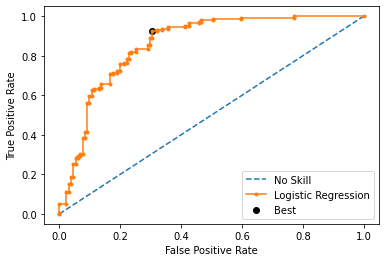

In [132]:
# Logistic Regression

# calculate roc curves
log_fpr, log_tpr, log_thresholds = roc_curve(y_test, log_probs)
# calculate the g-mean for each threshold
log_gmeans = np.sqrt(log_tpr * (1-log_fpr))
# locate the index of the largest g-mean
log_ix = np.argmax(log_gmeans)
print("Logistic Regression:")
print("AUC: ", auc(log_fpr, log_tpr))
print('Best Threshold=%f, G-Mean=%.3f' % (log_thresholds[log_ix], log_gmeans[log_ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(log_fpr, log_tpr, marker='.', label='Logistic Regression')
plt.scatter(log_fpr[log_ix], log_tpr[log_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Linear Discriminant Analysis:
AUC:  0.8687977099236641
Best Threshold=0.583055, G-Mean=0.829


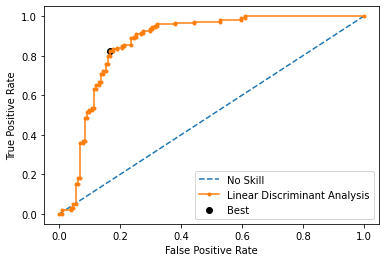

In [133]:
# Linear Discriminant Analysis

# calculate roc curves
lda_fpr, lda_tpr, lda_thresholds = roc_curve(y_test, lda_probs)
# calculate the g-mean for each threshold
lda_gmeans = np.sqrt(lda_tpr * (1-lda_fpr))
# locate the index of the largest g-mean
lda_ix = np.argmax(lda_gmeans)
print("Linear Discriminant Analysis:")
print("AUC: ", auc(lda_fpr, lda_tpr))
print('Best Threshold=%f, G-Mean=%.3f' % (lda_thresholds[lda_ix], lda_gmeans[lda_ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(lda_fpr, lda_tpr, marker='.', label='Linear Discriminant Analysis')
plt.scatter(lda_fpr[lda_ix], lda_tpr[lda_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

K-Nearest Neighbor:
AUC:  0.8480173876166243
Best Threshold=0.800000, G-Mean=0.783


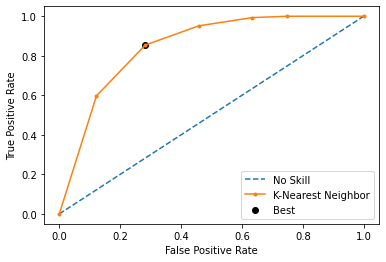

In [134]:
# K-Nearest Neighbor

# calculate roc curves
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_probs)
# calculate the g-mean for each threshold
knn_gmeans = np.sqrt(knn_tpr * (1-knn_fpr))
# locate the index of the largest g-mean
knn_ix = np.argmax(knn_gmeans)
print("K-Nearest Neighbor:")
print("AUC: ", auc(knn_fpr, knn_tpr))
print('Best Threshold=%f, G-Mean=%.3f' % (knn_thresholds[knn_ix], knn_gmeans[knn_ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(knn_fpr, knn_tpr, marker='.', label='K-Nearest Neighbor')
plt.scatter(knn_fpr[knn_ix], knn_tpr[knn_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Classification and Regression Tree:
AUC:  0.7705682782018659
Best Threshold=1.000000, G-Mean=0.771


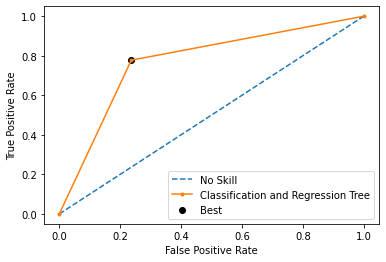

In [135]:
# Classification and Regression Tree

# calculate roc curves
cart_fpr, cart_tpr, cart_thresholds = roc_curve(y_test, cart_probs)
# calculate the g-mean for each threshold
cart_gmeans = np.sqrt(cart_tpr * (1-cart_fpr))
# locate the index of the largest g-mean
cart_ix = np.argmax(cart_gmeans)
print("Classification and Regression Tree:")
print("AUC: ", auc(cart_fpr, cart_tpr))
print('Best Threshold=%f, G-Mean=%.3f' % (cart_thresholds[cart_ix], cart_gmeans[cart_ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(cart_fpr, cart_tpr, marker='.', label='Classification and Regression Tree')
plt.scatter(cart_fpr[cart_ix], cart_tpr[cart_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Gaussian Naive Bayes:
AUC:  0.853530534351145
Best Threshold=0.122856, G-Mean=0.786


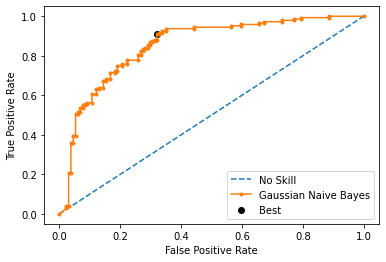

In [136]:
# Gaussian Naive Bayes

# calculate roc curves
gnb_fpr, gnb_tpr, gnb_thresholds = roc_curve(y_test, gnb_probs)
# calculate the g-mean for each threshold
gnb_gmeans = np.sqrt(gnb_tpr * (1-gnb_fpr))
# locate the index of the largest g-mean
gnb_ix = np.argmax(gnb_gmeans)
print("Gaussian Naive Bayes:")
print("AUC: ", auc(gnb_fpr, gnb_tpr))
print('Best Threshold=%f, G-Mean=%.3f' % (gnb_thresholds[gnb_ix], gnb_gmeans[gnb_ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(gnb_fpr, gnb_tpr, marker='.', label='Gaussian Naive Bayes')
plt.scatter(gnb_fpr[gnb_ix], gnb_tpr[gnb_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Support Vector Machines:
AUC:  0.8659351145038168
Best Threshold=0.567286, G-Mean=0.815


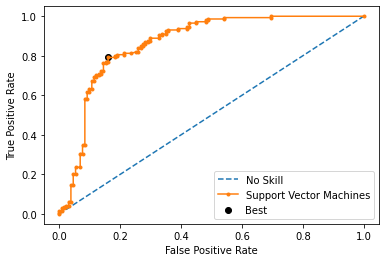

In [137]:
# Support Vector Machines

# calculate roc curves
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_probs)
# calculate the g-mean for each threshold
svm_gmeans = np.sqrt(svm_tpr * (1-svm_fpr))
# locate the index of the largest g-mean
svm_ix = np.argmax(svm_gmeans)
print("Support Vector Machines:")
print("AUC: ", auc(svm_fpr, svm_tpr))
print('Best Threshold=%f, G-Mean=%.3f' % (svm_thresholds[svm_ix], svm_gmeans[svm_ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(svm_fpr, svm_tpr, marker='.', label='Support Vector Machines')
plt.scatter(svm_fpr[svm_ix], svm_tpr[svm_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Random Forest Classifier:
AUC:  0.9671861747243427
Best Threshold=0.530000, G-Mean=0.909


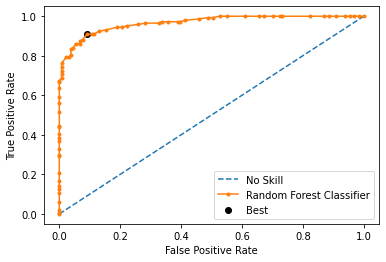

In [138]:
# Random Forest Classifier

# calculate roc curves
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_test, rfc_probs)
# calculate the g-mean for each threshold
rfc_gmeans = np.sqrt(rfc_tpr * (1-rfc_fpr))
# locate the index of the largest g-mean
rfc_ix = np.argmax(rfc_gmeans)
print("Random Forest Classifier:")
print("AUC: ", auc(rfc_fpr, rfc_tpr))
print('Best Threshold=%f, G-Mean=%.3f' % (rfc_thresholds[rfc_ix], rfc_gmeans[rfc_ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Random Forest Classifier')
plt.scatter(rfc_fpr[rfc_ix], rfc_tpr[rfc_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [139]:
# Logistic Regression

log_model = LogisticRegression()
log_model.fit(X, y)
scores = cross_val_score(log_model, X, y, cv=5)
print("Logistic Regression: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# Linear Discriminant Analysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X, y)
scores = cross_val_score(lda_model, X, y, cv=5)
print("Linear Discriminant Analysis: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# K-Nearest Neigbors

knn_model = KNeighborsClassifier()
knn_model.fit(X, y)
scores = cross_val_score(knn_model, X, y, cv=5)
print("K-Nearest Neighbors: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# Classification and Regression Trees

cart_model = DecisionTreeClassifier()
cart_model.fit(X, y)
scores = cross_val_score(cart_model, X, y, cv=5)
print("Classification and Regression Trees: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# Gaussian Naive Bayes

gnb_model = GaussianNB()
gnb_model.fit(X, y)
scores = cross_val_score(gnb_model, X, y, cv=5)
print("Gaussian Naive Bayes: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# Support Vector Machines

svm_model = SVC(kernel='linear', gamma = 'auto', probability=True)
svm_model.fit(X, y)
scores = cross_val_score(svm_model, X, y, cv=5)
print("Support Vector Machines: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# Random Forest Classifier

rfc_model = RandomForestClassifier()
rfc_model.fit(X, y)
scores = cross_val_score(rfc_model, X, y, cv=5)
print("Random Forest Classifier: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

Logistic Regression: 0.803 accuracy with a standard deviation of 0.029
Linear Discriminant Analysis: 0.793 accuracy with a standard deviation of 0.029
K-Nearest Neighbors: 0.773 accuracy with a standard deviation of 0.034
Classification and Regression Trees: 0.805 accuracy with a standard deviation of 0.035
Gaussian Naive Bayes: 0.739 accuracy with a standard deviation of 0.031
Support Vector Machines: 0.794 accuracy with a standard deviation of 0.038
Random Forest Classifier: 0.920 accuracy with a standard deviation of 0.035


In [140]:
# Logistic Regression
scores = cross_val_score(log_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.79      0.78      0.79        69
           1       0.79      0.80      0.79        69

    accuracy                           0.79       138
   macro avg       0.79      0.79      0.79       138
weighted avg       0.79      0.79      0.79       138

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        68
           1       0.79      0.86      0.82        69

    accuracy                           0.81       137
   macro avg       0.81      0.81      0.81       137
weighted avg       0.81      0.81      0.81       137

              precision    recall  f1-score   support

           0       0.82      0.68      0.74        68
           1       0.73      0.86      0.79        69

    accuracy                           0.77       137
   macro avg       0.77      0.77      0.76       137
weighted avg       0.77      0.77      0.76       137

              preci

In [141]:
# Linear Discriminant Analysis
scores = cross_val_score(lda_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.76      0.74      0.75        69
           1       0.75      0.77      0.76        69

    accuracy                           0.75       138
   macro avg       0.75      0.75      0.75       138
weighted avg       0.75      0.75      0.75       138

              precision    recall  f1-score   support

           0       0.86      0.74      0.79        68
           1       0.77      0.88      0.82        69

    accuracy                           0.81       137
   macro avg       0.82      0.81      0.81       137
weighted avg       0.82      0.81      0.81       137

              precision    recall  f1-score   support

           0       0.85      0.65      0.73        68
           1       0.72      0.88      0.79        69

    accuracy                           0.77       137
   macro avg       0.78      0.77      0.76       137
weighted avg       0.78      0.77      0.76       137

              preci

In [142]:
# K-Nearest Neigbors
knn_model = KNeighborsClassifier()
knn_model.fit(X, y)
scores = cross_val_score(knn_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.92      0.68      0.78        69
           1       0.75      0.94      0.83        69

    accuracy                           0.81       138
   macro avg       0.83      0.81      0.81       138
weighted avg       0.83      0.81      0.81       138

              precision    recall  f1-score   support

           0       0.91      0.62      0.74        68
           1       0.71      0.94      0.81        69

    accuracy                           0.78       137
   macro avg       0.81      0.78      0.77       137
weighted avg       0.81      0.78      0.77       137

              precision    recall  f1-score   support

           0       1.00      0.44      0.61        68
           1       0.64      1.00      0.78        69

    accuracy                           0.72       137
   macro avg       0.82      0.72      0.70       137
weighted avg       0.82      0.72      0.70       137

              preci

In [143]:
# Classification and Regression Trees
cart_model = DecisionTreeClassifier()
cart_model.fit(X, y)
scores = cross_val_score(cart_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.76      0.86      0.80        69
           1       0.83      0.72      0.78        69

    accuracy                           0.79       138
   macro avg       0.79      0.79      0.79       138
weighted avg       0.79      0.79      0.79       138

              precision    recall  f1-score   support

           0       0.81      0.82      0.82        68
           1       0.82      0.81      0.82        69

    accuracy                           0.82       137
   macro avg       0.82      0.82      0.82       137
weighted avg       0.82      0.82      0.82       137

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        68
           1       0.78      0.88      0.83        69

    accuracy                           0.82       137
   macro avg       0.82      0.82      0.82       137
weighted avg       0.82      0.82      0.82       137

              preci

In [144]:
# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X, y)
scores = cross_val_score(gnb_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.70      0.84      0.76        69
           1       0.80      0.64      0.71        69

    accuracy                           0.74       138
   macro avg       0.75      0.74      0.74       138
weighted avg       0.75      0.74      0.74       138

              precision    recall  f1-score   support

           0       0.74      0.72      0.73        68
           1       0.73      0.75      0.74        69

    accuracy                           0.74       137
   macro avg       0.74      0.74      0.74       137
weighted avg       0.74      0.74      0.74       137

              precision    recall  f1-score   support

           0       0.71      0.72      0.72        68
           1       0.72      0.71      0.72        69

    accuracy                           0.72       137
   macro avg       0.72      0.72      0.72       137
weighted avg       0.72      0.72      0.72       137

              preci

In [145]:
# Support Vector Machines
svm_model = SVC(kernel='linear', gamma = 'auto', probability=True)
svm_model.fit(X, y)
scores = cross_val_score(svm_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.81      0.72      0.76        69
           1       0.75      0.83      0.79        69

    accuracy                           0.78       138
   macro avg       0.78      0.78      0.77       138
weighted avg       0.78      0.78      0.77       138

              precision    recall  f1-score   support

           0       0.84      0.71      0.77        68
           1       0.75      0.87      0.81        69

    accuracy                           0.79       137
   macro avg       0.80      0.79      0.79       137
weighted avg       0.80      0.79      0.79       137

              precision    recall  f1-score   support

           0       0.87      0.60      0.71        68
           1       0.70      0.91      0.79        69

    accuracy                           0.76       137
   macro avg       0.79      0.76      0.75       137
weighted avg       0.79      0.76      0.75       137

              preci

In [146]:
# Random Forest Classifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X, y)
scores = cross_val_score(rfc_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92        69
           1       0.98      0.84      0.91        69

    accuracy                           0.91       138
   macro avg       0.92      0.91      0.91       138
weighted avg       0.92      0.91      0.91       138

              precision    recall  f1-score   support

           0       0.94      0.91      0.93        68
           1       0.92      0.94      0.93        69

    accuracy                           0.93       137
   macro avg       0.93      0.93      0.93       137
weighted avg       0.93      0.93      0.93       137

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        68
           1       0.86      0.96      0.90        69

    accuracy                           0.90       137
   macro avg       0.90      0.90      0.90       137
weighted avg       0.90      0.90      0.90       137

              preci

In [147]:
# Logistic Regression

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(log_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
Sodium (mmol/L),1
Serum Folate (nmol/L),1
Serum Homocysteine (µmol/L),1
25-hydroxy Vitamin D (nmol/L),1
C-Reactive Protein,1
RBC (/L),1
PCV (L/L),1
ALT,1
Total Bilirubin (µmol/L),1
Potassium (mmol/L),1


In [148]:
# Linear Discriminant Analysis

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(lda_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
MCH (pg),1
Globulin (g/L),1
MCHC (g/L),1
Albumin (g/L),1
PCV (L/L),1
Total Protein (g/L),1
ALT,1
C-Reactive Protein,1
Serum Homocysteine (µmol/L),1
RBC (/L),1


In [149]:
# Classification and Regression Trees

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(cart_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
C-Reactive Protein,1
Serum Homocysteine (µmol/L),1
25-hydroxy Vitamin D (nmol/L),1
Triglyceride (mmol/L),1
Potassium (mmol/L),1
PCV (L/L),1
Free Tri-iodothyronine (FT3) (pmol/L),1
White Cell Count (/L),1
Glucose (mmol/L),1
Creatinine (umol/L),1


In [150]:
# Support Vector Machines

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(svm_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
Sodium (mmol/L),1
Monocytes (/L),1
Total Bilirubin (µmol/L),1
GGT,1
C-Reactive Protein,1
PCV (L/L),1
ALT,1
Serum Homocysteine (µmol/L),1
Serum Folate (nmol/L),1
RBC (/L),1


In [151]:
# Random Forest Classifier

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(rfc_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
Serum Folate (nmol/L),1
Serum Homocysteine (µmol/L),1
25-hydroxy Vitamin D (nmol/L),1
Neutrophils (/L),1
RBC (/L),1
PCV (L/L),1
C-Reactive Protein,1
Free Tri-iodothyronine (FT3) (pmol/L),1
White Cell Count (/L),1
ALT,1


C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


>LOG 0.743 (0.068)
>LDA 0.724 (0.082)
>CART 0.758 (0.079)
>SVM 0.734 (0.072)
>RFC 0.735 (0.062)


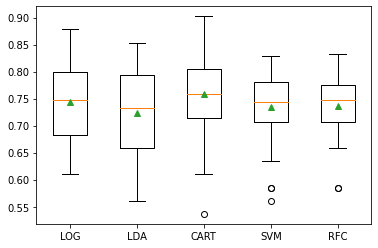

In [152]:
from sklearn.pipeline import Pipeline
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt

# get a list of models to evaluate
def get_models():
    models = dict()
    # Logistic Regression
    rfe = RFE(log_model, 10)
    model = DecisionTreeClassifier()
    models['LOG'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Linear Discriminant Analysis
    rfe = RFE(lda_model, 10)
    model = DecisionTreeClassifier()
    models['LDA'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Classification & Regression Trees
    rfe = RFE(cart_model, 10)
    model = DecisionTreeClassifier()
    models['CART'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Support Vector Machines
    rfe = RFE(svm_model, 10)
    model = DecisionTreeClassifier()
    models['SVM'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Random Forest Classifier
    rfe = RFE(rfc_model, 10)
    model = DecisionTreeClassifier()
    models['RFC'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [153]:
# Test 5: New Dataset, Robust and Non-Robust (100 samples)

In [154]:
# Pre-parse the dataset
data = RobustFrailMCIpreprocess("rawfile_final.csv")

robust       368
frail_mci     86
Name: condition, dtype: int64

####################################################################
Number of Rows of Dataframe:
454
Number of Columns of Dataframe:
59

####################################################################
Threshold for number of NULLs in a column: 0.1095
Number of Columns before Parsing for Too Many NULLs in a column:
59
Number of Columns after Parsing for Too Many NULLs in a column:
51

Columns Removed:
B1_b5
B4_a1
B4_a3
B4_a4
B4_a6
B4_b1
B4_b3
B5_a1

####################################################################
Number of Columns after dropping B1_b4, B2_c3, B4_b2 for inconsistent data types:
48

####################################################################
Number of Rows before Parsing NULLs in data:
454
Number of Rows after Parsing NULLs in data:
419


In [155]:
# Taking only Frail+MCI and Robust classes

df1 = data[data.condition == 'frail_mci']
df1 = df1.reset_index(drop=True)

df2 = data[data.condition == 'robust']
df2 = df2.reset_index(drop=True)

data = pd.concat([df1, df2], ignore_index=True)

In [156]:
data.head()

,mtag,condition,A1_1,A1_2,A2_1,A3_1,B1_a,B1_a1,B1_a2,B1_a3,...,B2_d6,B2_d7,B2_d8,B2_d9,B3,B4_a2,B4_a5,B5_a2,B5_a3,B6
0,ME01378,frail_mci,241,13.0,20,33.5,150,5.25,0.46,87,...,10,21,22,17,1.3,7.0,1.010,0.69,4.7,5.9
1,ME02832,frail_mci,444,43.8,16,87.0,134,4.65,0.40,85,...,10,14,20,15,13.4,6.0,1.005,1.29,4.5,5.8
2,ME02909,frail_mci,1476,54.5,16,57.0,119,3.80,0.36,94,...,18,17,35,21,0.2,7.5,1.012,1.90,4.1,5.8
3,ME02998,frail_mci,339,25.9,18,63.8,135,4.89,0.42,86,...,13,16,25,13,16.8,5.0,1.017,1.32,4.0,6.0
4,ME03061,frail_mci,287,23.8,20,95.5,146,5.18,0.44,85,...,18,22,25,24,1.4,7.5,1.006,2.94,4.6,6.1


In [157]:
data.tail()

,mtag,condition,A1_1,A1_2,A2_1,A3_1,B1_a,B1_a1,B1_a2,B1_a3,...,B2_d6,B2_d7,B2_d8,B2_d9,B3,B4_a2,B4_a5,B5_a2,B5_a3,B6
414,MV00454,robust,220,24.6,19,67.5,138,4.66,0.42,91,...,20,10,17,8,6.6,7.0,1.015,1.29,4.5,6.2
415,MV00456,robust,334,20.1,18,51.0,139,4.63,0.42,91,...,16,22,35,40,1.0,6.0,1.015,1.88,3.9,5.6
416,MV00460,robust,418,54.4,17,61.0,122,4.18,0.38,90,...,19,20,23,15,0.4,6.5,1.005,3.58,4.0,5.6
417,MV00502,robust,393,38.2,18,43.1,136,4.57,0.43,94,...,13,11,22,23,0.7,7.0,1.009,0.92,4.1,6.0
418,MV00510,robust,371,23.2,24,55.9,127,4.41,0.40,90,...,13,14,16,12,7.5,8.0,1.017,2.45,4.5,6.2


In [158]:
c = data['condition'].value_counts()
condition = c.index
c

robust       343
frail_mci     76
Name: condition, dtype: int64

In [159]:
for i in range(len(condition)):
    data['condition'].replace(condition[i], i, inplace = True)

data.head()

,mtag,condition,A1_1,A1_2,A2_1,A3_1,B1_a,B1_a1,B1_a2,B1_a3,...,B2_d6,B2_d7,B2_d8,B2_d9,B3,B4_a2,B4_a5,B5_a2,B5_a3,B6
0,ME01378,1,241,13.0,20,33.5,150,5.25,0.46,87,...,10,21,22,17,1.3,7.0,1.010,0.69,4.7,5.9
1,ME02832,1,444,43.8,16,87.0,134,4.65,0.40,85,...,10,14,20,15,13.4,6.0,1.005,1.29,4.5,5.8
2,ME02909,1,1476,54.5,16,57.0,119,3.80,0.36,94,...,18,17,35,21,0.2,7.5,1.012,1.90,4.1,5.8
3,ME02998,1,339,25.9,18,63.8,135,4.89,0.42,86,...,13,16,25,13,16.8,5.0,1.017,1.32,4.0,6.0
4,ME03061,1,287,23.8,20,95.5,146,5.18,0.44,85,...,18,22,25,24,1.4,7.5,1.006,2.94,4.6,6.1


In [160]:
data.tail()

,mtag,condition,A1_1,A1_2,A2_1,A3_1,B1_a,B1_a1,B1_a2,B1_a3,...,B2_d6,B2_d7,B2_d8,B2_d9,B3,B4_a2,B4_a5,B5_a2,B5_a3,B6
414,MV00454,0,220,24.6,19,67.5,138,4.66,0.42,91,...,20,10,17,8,6.6,7.0,1.015,1.29,4.5,6.2
415,MV00456,0,334,20.1,18,51.0,139,4.63,0.42,91,...,16,22,35,40,1.0,6.0,1.015,1.88,3.9,5.6
416,MV00460,0,418,54.4,17,61.0,122,4.18,0.38,90,...,19,20,23,15,0.4,6.5,1.005,3.58,4.0,5.6
417,MV00502,0,393,38.2,18,43.1,136,4.57,0.43,94,...,13,11,22,23,0.7,7.0,1.009,0.92,4.1,6.0
418,MV00510,0,371,23.2,24,55.9,127,4.41,0.40,90,...,13,14,16,12,7.5,8.0,1.017,2.45,4.5,6.2


In [161]:
y = data['condition']

features = ['A1_1', 'A1_2', 'A2_1', 'A3_1', 'B1_a', 'B1_a1', 'B1_a2',
       'B1_a3', 'B1_a4', 'B1_a5', 'B1_a6', 'B1_b', 'B1_b1', 'B1_b2', 'B1_b3',
       'B1_c', 'B1_d', 'B2_a1', 'B2_a2', 'B2_a3', 'B2_a4', 'B2_a5', 'B2_b1',
       'B2_b2', 'B2_b3', 'B2_c1', 'B2_c2', 'B2_c4', 'B2_c5', 'B2_c6', 'B2_c7',
       'B2_d1', 'B2_d2', 'B2_d3', 'B2_d4', 'B2_d5', 'B2_d6', 'B2_d7', 'B2_d8',
       'B2_d9', 'B3', 'B4_a2', 'B4_a5', 'B5_a2', 'B5_a3', 'B6']
X = data[features]

X = StandardScaler().fit_transform(X)
X = MinMaxScaler().fit_transform(X)

In [162]:
sampling_strategy = {0: 76, 1: 76}
undersample = RandomUnderSampler(sampling_strategy=sampling_strategy)

X, y = undersample.fit_resample(X, y)

# Transform the dataset using SMOTE
sampling_strategy = {0: 100, 1: 100}
oversample = SMOTE(sampling_strategy=sampling_strategy)
X, y = oversample.fit_resample(X, y)

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (100) in class 0 will be larger than the number of samples in the majority class (class #0 -> 76)
  n_samples_majority,
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (100) in class 1 will be larger than the number of samples in the majority class (class #0 -> 76)
  n_samples_majority,


In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

# Logistic Regression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
print("Logistic Regression:", log_model.score(X_test, y_test).round(3))

# Linear Discriminant Analysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
print("Linear Discriminant Analysis:", lda_model.score(X_test, y_test).round(3))

# K-Nearest Neigbors

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
print("K-Nearest Neigbors:", knn_model.score(X_test, y_test).round(3))

# Classification and Regression Trees

cart_model = DecisionTreeClassifier()
cart_model.fit(X_train, y_train)
print("Classification and Regression Trees:", cart_model.score(X_test, y_test).round(3))

# Gaussian Naive Bayes

gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
print("Gaussian Naive Bayes:", gnb_model.score(X_test, y_test).round(3))

# Support Vector Machines

svm_model = SVC(kernel='linear', gamma = 'auto', probability=True)
svm_model.fit(X_train, y_train)
print("Support Vector Machines:", svm_model.score(X_test, y_test).round(3))

# Random Forest Classifier

rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)
print("Random Forest Classifier:", rfc_model.score(X_test, y_test).round(3))

Logistic Regression: 0.8
Linear Discriminant Analysis: 0.738
K-Nearest Neigbors: 0.725
Classification and Regression Trees: 0.762
Gaussian Naive Bayes: 0.75
Support Vector Machines: 0.8
Random Forest Classifier: 0.825


In [164]:
# Calculating for Logistic Regression
log_pred = log_model.predict(X_test)

print('Performance Metrics for Logistic Regression:\n')
print(accuracy_score(y_test, log_pred).round(5), '\n')
print(confusion_matrix(y_test, log_pred), '\n')
print(classification_report(y_test, log_pred))

Performance Metrics for Logistic Regression:

0.8 

[[32 10]
 [ 6 32]] 

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        42
           1       0.76      0.84      0.80        38

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80



In [165]:
# Calculating for LDA
lda_pred = lda_model.predict(X_test)

print('Performance Metrics for LDA:\n')
print(accuracy_score(y_test, lda_pred).round(5), '\n')
print(confusion_matrix(y_test, lda_pred), '\n')
print(classification_report(y_test, lda_pred))

Performance Metrics for LDA:

0.7375 

[[30 12]
 [ 9 29]] 

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        42
           1       0.71      0.76      0.73        38

    accuracy                           0.74        80
   macro avg       0.74      0.74      0.74        80
weighted avg       0.74      0.74      0.74        80



In [166]:
# Calculating for kNN
knn_pred = knn_model.predict(X_test)

print('Performance Metrics for KNN:\n')
print(accuracy_score(y_test, knn_pred).round(5), '\n')
print(confusion_matrix(y_test, knn_pred), '\n')
print(classification_report(y_test, knn_pred))

Performance Metrics for KNN:

0.725 

[[36  6]
 [16 22]] 

              precision    recall  f1-score   support

           0       0.69      0.86      0.77        42
           1       0.79      0.58      0.67        38

    accuracy                           0.73        80
   macro avg       0.74      0.72      0.72        80
weighted avg       0.74      0.72      0.72        80



In [167]:
# Calculating for CART
cart_pred = cart_model.predict(X_test)

print('Performance Metrics for CART:\n')
print(accuracy_score(y_test, cart_pred).round(5), '\n')
print(confusion_matrix(y_test, cart_pred), '\n')
print(classification_report(y_test, cart_pred))

Performance Metrics for CART:

0.7625 

[[26 16]
 [ 3 35]] 

              precision    recall  f1-score   support

           0       0.90      0.62      0.73        42
           1       0.69      0.92      0.79        38

    accuracy                           0.76        80
   macro avg       0.79      0.77      0.76        80
weighted avg       0.80      0.76      0.76        80



In [168]:
# Calculating for GNB
gnb_pred = log_model.predict(X_test)

print('Performance Metrics for GNB:\n')
print(accuracy_score(y_test, gnb_pred).round(5), '\n')
print(confusion_matrix(y_test, gnb_pred), '\n')
print(classification_report(y_test, gnb_pred))

Performance Metrics for GNB:

0.8 

[[32 10]
 [ 6 32]] 

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        42
           1       0.76      0.84      0.80        38

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80



In [169]:
# Calculating for Support Vector Machine
svm_pred = svm_model.predict(X_test)

print('Performance Metrics for SVM:\n')
print(accuracy_score(y_test, svm_pred).round(5), '\n')
print(confusion_matrix(y_test, svm_pred), '\n')
print(classification_report(y_test, svm_pred))

Performance Metrics for SVM:

0.8 

[[32 10]
 [ 6 32]] 

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        42
           1       0.76      0.84      0.80        38

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80



In [170]:
# Calculating for Random Forest Classifier
rfc_pred = rfc_model.predict(X_test)

print('Performance Metrics for RFC:\n')
print(accuracy_score(y_test, rfc_pred).round(5), '\n')
print(confusion_matrix(y_test, rfc_pred), '\n')
print(classification_report(y_test, rfc_pred))

Performance Metrics for RFC:

0.825 

[[32 10]
 [ 4 34]] 

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        42
           1       0.77      0.89      0.83        38

    accuracy                           0.82        80
   macro avg       0.83      0.83      0.82        80
weighted avg       0.83      0.82      0.82        80



In [171]:
# Logistic Regression

# predict probabilities
log_probs = log_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
log_probs = log_probs[:, 1]

# Linear Discriminant Analysis

# predict probabilities
lda_probs = lda_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lda_probs = lda_probs[:, 1]

# K-Nearest Neigbors

# predict probabilities
knn_probs = knn_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
knn_probs = knn_probs[:, 1]

# Classification and Regression Trees

# predict probabilities
cart_probs = cart_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
cart_probs = cart_probs[:, 1]

# Gaussian Naive Bayes

# predict probabilities
gnb_probs = gnb_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
gnb_probs = gnb_probs[:, 1]

# Support Vector Machines

# predict probabilities
svm_probs = svm_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
svm_probs = svm_probs[:, 1]

# Random Forest Classifier

# predict probabilities
rfc_probs = rfc_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
rfc_probs = rfc_probs[:, 1]

Logistic Regression:
AUC:  0.8352130325814535
Best Threshold=0.539808, G-Mean=0.813


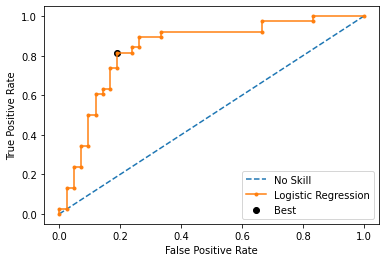

In [172]:
# Logistic Regression

# calculate roc curves
log_fpr, log_tpr, log_thresholds = roc_curve(y_test, log_probs)
# calculate the g-mean for each threshold
log_gmeans = np.sqrt(log_tpr * (1-log_fpr))
# locate the index of the largest g-mean
log_ix = np.argmax(log_gmeans)
print("Logistic Regression:")
print("AUC: ", auc(log_fpr, log_tpr))
print('Best Threshold=%f, G-Mean=%.3f' % (log_thresholds[log_ix], log_gmeans[log_ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(log_fpr, log_tpr, marker='.', label='Logistic Regression')
plt.scatter(log_fpr[log_ix], log_tpr[log_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Linear Discriminant Analysis:
AUC:  0.773809523809524
Best Threshold=0.765446, G-Mean=0.797


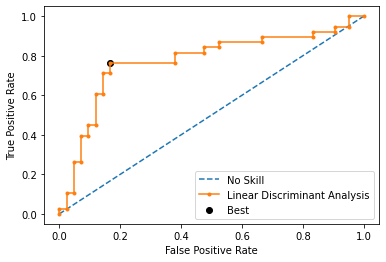

In [173]:
# Linear Discriminant Analysis

# calculate roc curves
lda_fpr, lda_tpr, lda_thresholds = roc_curve(y_test, lda_probs)
# calculate the g-mean for each threshold
lda_gmeans = np.sqrt(lda_tpr * (1-lda_fpr))
# locate the index of the largest g-mean
lda_ix = np.argmax(lda_gmeans)
print("Linear Discriminant Analysis:")
print("AUC: ", auc(lda_fpr, lda_tpr))
print('Best Threshold=%f, G-Mean=%.3f' % (lda_thresholds[lda_ix], lda_gmeans[lda_ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(lda_fpr, lda_tpr, marker='.', label='Linear Discriminant Analysis')
plt.scatter(lda_fpr[lda_ix], lda_tpr[lda_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

K-Nearest Neighbor:
AUC:  0.806704260651629
Best Threshold=0.400000, G-Mean=0.725


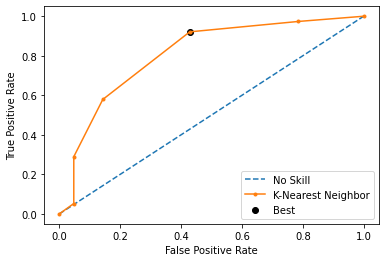

In [174]:
# K-Nearest Neighbor

# calculate roc curves
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_probs)
# calculate the g-mean for each threshold
knn_gmeans = np.sqrt(knn_tpr * (1-knn_fpr))
# locate the index of the largest g-mean
knn_ix = np.argmax(knn_gmeans)
print("K-Nearest Neighbor:")
print("AUC: ", auc(knn_fpr, knn_tpr))
print('Best Threshold=%f, G-Mean=%.3f' % (knn_thresholds[knn_ix], knn_gmeans[knn_ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(knn_fpr, knn_tpr, marker='.', label='K-Nearest Neighbor')
plt.scatter(knn_fpr[knn_ix], knn_tpr[knn_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Classification and Regression Tree:
AUC:  0.7700501253132832
Best Threshold=1.000000, G-Mean=0.755


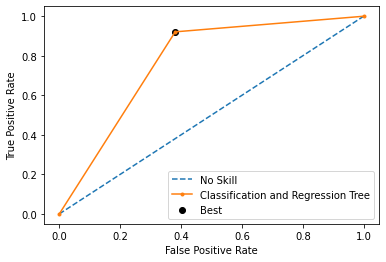

In [175]:
# Classification and Regression Tree

# calculate roc curves
cart_fpr, cart_tpr, cart_thresholds = roc_curve(y_test, cart_probs)
# calculate the g-mean for each threshold
cart_gmeans = np.sqrt(cart_tpr * (1-cart_fpr))
# locate the index of the largest g-mean
cart_ix = np.argmax(cart_gmeans)
print("Classification and Regression Tree:")
print("AUC: ", auc(cart_fpr, cart_tpr))
print('Best Threshold=%f, G-Mean=%.3f' % (cart_thresholds[cart_ix], cart_gmeans[cart_ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(cart_fpr, cart_tpr, marker='.', label='Classification and Regression Tree')
plt.scatter(cart_fpr[cart_ix], cart_tpr[cart_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Gaussian Naive Bayes:
AUC:  0.8587092731829574
Best Threshold=0.007279, G-Mean=0.797


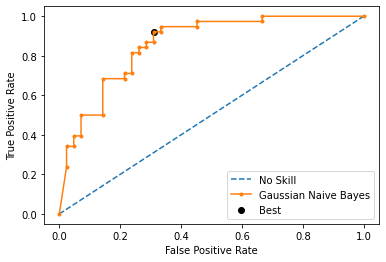

In [176]:
# Gaussian Naive Bayes

# calculate roc curves
gnb_fpr, gnb_tpr, gnb_thresholds = roc_curve(y_test, gnb_probs)
# calculate the g-mean for each threshold
gnb_gmeans = np.sqrt(gnb_tpr * (1-gnb_fpr))
# locate the index of the largest g-mean
gnb_ix = np.argmax(gnb_gmeans)
print("Gaussian Naive Bayes:")
print("AUC: ", auc(gnb_fpr, gnb_tpr))
print('Best Threshold=%f, G-Mean=%.3f' % (gnb_thresholds[gnb_ix], gnb_gmeans[gnb_ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(gnb_fpr, gnb_tpr, marker='.', label='Gaussian Naive Bayes')
plt.scatter(gnb_fpr[gnb_ix], gnb_tpr[gnb_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Support Vector Machines:
AUC:  0.843358395989975
Best Threshold=0.512695, G-Mean=0.826


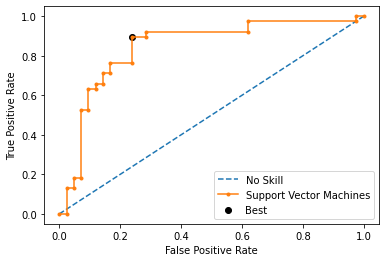

In [177]:
# Support Vector Machines

# calculate roc curves
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_probs)
# calculate the g-mean for each threshold
svm_gmeans = np.sqrt(svm_tpr * (1-svm_fpr))
# locate the index of the largest g-mean
svm_ix = np.argmax(svm_gmeans)
print("Support Vector Machines:")
print("AUC: ", auc(svm_fpr, svm_tpr))
print('Best Threshold=%f, G-Mean=%.3f' % (svm_thresholds[svm_ix], svm_gmeans[svm_ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(svm_fpr, svm_tpr, marker='.', label='Support Vector Machines')
plt.scatter(svm_fpr[svm_ix], svm_tpr[svm_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Random Forest Classifier:
AUC:  0.886904761904762
Best Threshold=0.530000, G-Mean=0.838


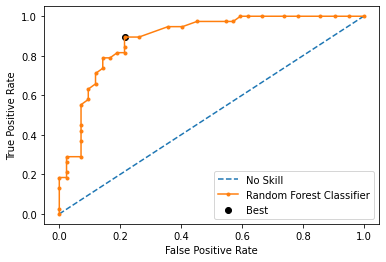

In [178]:
# Random Forest Classifier

# calculate roc curves
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_test, rfc_probs)
# calculate the g-mean for each threshold
rfc_gmeans = np.sqrt(rfc_tpr * (1-rfc_fpr))
# locate the index of the largest g-mean
rfc_ix = np.argmax(rfc_gmeans)
print("Random Forest Classifier:")
print("AUC: ", auc(rfc_fpr, rfc_tpr))
print('Best Threshold=%f, G-Mean=%.3f' % (rfc_thresholds[rfc_ix], rfc_gmeans[rfc_ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Random Forest Classifier')
plt.scatter(rfc_fpr[rfc_ix], rfc_tpr[rfc_ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [179]:
# Logistic Regression

log_model = LogisticRegression()
log_model.fit(X, y)
scores = cross_val_score(log_model, X, y, cv=5)
print("Logistic Regression: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# Linear Discriminant Analysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X, y)
scores = cross_val_score(lda_model, X, y, cv=5)
print("Linear Discriminant Analysis: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# K-Nearest Neigbors

knn_model = KNeighborsClassifier()
knn_model.fit(X, y)
scores = cross_val_score(knn_model, X, y, cv=5)
print("K-Nearest Neighbors: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# Classification and Regression Trees

cart_model = DecisionTreeClassifier()
cart_model.fit(X, y)
scores = cross_val_score(cart_model, X, y, cv=5)
print("Classification and Regression Trees: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# Gaussian Naive Bayes

gnb_model = GaussianNB()
gnb_model.fit(X, y)
scores = cross_val_score(gnb_model, X, y, cv=5)
print("Gaussian Naive Bayes: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# Support Vector Machines

svm_model = SVC(kernel='linear', gamma = 'auto', probability=True)
svm_model.fit(X, y)
scores = cross_val_score(svm_model, X, y, cv=5)
print("Support Vector Machines: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

# Random Forest Classifier

rfc_model = RandomForestClassifier()
rfc_model.fit(X, y)
scores = cross_val_score(rfc_model, X, y, cv=5)
print("Random Forest Classifier: %0.3f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

Logistic Regression: 0.780 accuracy with a standard deviation of 0.073
Linear Discriminant Analysis: 0.775 accuracy with a standard deviation of 0.089
K-Nearest Neighbors: 0.730 accuracy with a standard deviation of 0.104
Classification and Regression Trees: 0.785 accuracy with a standard deviation of 0.094
Gaussian Naive Bayes: 0.745 accuracy with a standard deviation of 0.048
Support Vector Machines: 0.795 accuracy with a standard deviation of 0.084
Random Forest Classifier: 0.840 accuracy with a standard deviation of 0.098


In [180]:
# Logistic Regression
scores = cross_val_score(log_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.71      0.75      0.73        20
           1       0.74      0.70      0.72        20

    accuracy                           0.73        40
   macro avg       0.73      0.72      0.72        40
weighted avg       0.73      0.72      0.72        40

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        20
           1       0.69      0.90      0.78        20

    accuracy                           0.75        40
   macro avg       0.77      0.75      0.74        40
weighted avg       0.77      0.75      0.74        40

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        20
           1       0.78      0.70      0.74        20

    accuracy                           0.75        40
   macro avg       0.75      0.75      0.75        40
weighted avg       0.75      0.75      0.75        40

              preci

In [181]:
# Linear Discriminant Analysis
scores = cross_val_score(lda_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        20
           1       0.70      0.70      0.70        20

    accuracy                           0.70        40
   macro avg       0.70      0.70      0.70        40
weighted avg       0.70      0.70      0.70        40

              precision    recall  f1-score   support

           0       0.92      0.55      0.69        20
           1       0.68      0.95      0.79        20

    accuracy                           0.75        40
   macro avg       0.80      0.75      0.74        40
weighted avg       0.80      0.75      0.74        40

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        20
           1       0.75      0.75      0.75        20

    accuracy                           0.75        40
   macro avg       0.75      0.75      0.75        40
weighted avg       0.75      0.75      0.75        40

              preci

In [182]:
# K-Nearest Neigbors
knn_model = KNeighborsClassifier()
knn_model.fit(X, y)
scores = cross_val_score(knn_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.66      0.95      0.78        20
           1       0.91      0.50      0.65        20

    accuracy                           0.73        40
   macro avg       0.78      0.72      0.71        40
weighted avg       0.78      0.72      0.71        40

              precision    recall  f1-score   support

           0       0.58      0.70      0.64        20
           1       0.62      0.50      0.56        20

    accuracy                           0.60        40
   macro avg       0.60      0.60      0.60        40
weighted avg       0.60      0.60      0.60        40

              precision    recall  f1-score   support

           0       0.70      0.95      0.81        20
           1       0.92      0.60      0.73        20

    accuracy                           0.78        40
   macro avg       0.81      0.77      0.77        40
weighted avg       0.81      0.78      0.77        40

              preci

In [183]:
# Classification and Regression Trees
cart_model = DecisionTreeClassifier()
cart_model.fit(X, y)
scores = cross_val_score(cart_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.60      0.60      0.60        20
           1       0.60      0.60      0.60        20

    accuracy                           0.60        40
   macro avg       0.60      0.60      0.60        40
weighted avg       0.60      0.60      0.60        40

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        20
           1       0.75      0.75      0.75        20

    accuracy                           0.75        40
   macro avg       0.75      0.75      0.75        40
weighted avg       0.75      0.75      0.75        40

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.77      0.85      0.81        20

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40

              preci

In [184]:
# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X, y)
scores = cross_val_score(gnb_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        20
           1       0.82      0.70      0.76        20

    accuracy                           0.78        40
   macro avg       0.78      0.77      0.77        40
weighted avg       0.78      0.78      0.77        40

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        20
           1       0.81      0.85      0.83        20

    accuracy                           0.82        40
   macro avg       0.83      0.82      0.82        40
weighted avg       0.83      0.82      0.82        40

              precision    recall  f1-score   support

           0       0.68      0.85      0.76        20
           1       0.80      0.60      0.69        20

    accuracy                           0.73        40
   macro avg       0.74      0.72      0.72        40
weighted avg       0.74      0.72      0.72        40

              preci

In [185]:
# Support Vector Machines
svm_model = SVC(kernel='linear', gamma = 'auto', probability=True)
svm_model.fit(X, y)
scores = cross_val_score(svm_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.68      0.75      0.71        20
           1       0.72      0.65      0.68        20

    accuracy                           0.70        40
   macro avg       0.70      0.70      0.70        40
weighted avg       0.70      0.70      0.70        40

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        20
           1       0.75      0.90      0.82        20

    accuracy                           0.80        40
   macro avg       0.81      0.80      0.80        40
weighted avg       0.81      0.80      0.80        40

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        20
           1       0.82      0.70      0.76        20

    accuracy                           0.78        40
   macro avg       0.78      0.77      0.77        40
weighted avg       0.78      0.78      0.77        40

              preci

In [186]:
# Random Forest Classifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X, y)
scores = cross_val_score(rfc_model, X, y, cv=5, scoring=make_scorer(classification_report_with_accuracy_score))
print(scores)

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        20
           1       0.79      0.75      0.77        20

    accuracy                           0.78        40
   macro avg       0.78      0.78      0.77        40
weighted avg       0.78      0.78      0.77        40

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.73      0.80      0.76        20

    accuracy                           0.75        40
   macro avg       0.75      0.75      0.75        40
weighted avg       0.75      0.75      0.75        40

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.86      0.95      0.90        20

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40

              preci

In [187]:
# Logistic Regression

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(log_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
Sodium (mmol/L),1
Serum Folate (nmol/L),1
Serum Homocysteine (µmol/L),1
pH,1
ALT,1
RBC (/L),1
PCV (L/L),1
Creatinine (umol/L),1
Chloride (mmol/L),1
Glucose (mmol/L),1


In [188]:
# Linear Discriminant Analysis

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(lda_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
C-Reactive Protein,1
Total Protein (g/L),1
Albumin (g/L),1
Total Cholesterol/HDL Ratio,1
LDL Cholesterol (mmol/L),1
Globulin (g/L),1
Triglyceride (mmol/L),1
Total Cholesterol (mmol/L),1
Albumin/Globulin ratio,1
Glucose (mmol/L),1


In [189]:
# Classification and Regression Trees

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(cart_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
LDL Cholesterol (mmol/L),1
Potassium (mmol/L),1
pH,1
Triglyceride (mmol/L),1
Glucose (mmol/L),1
White Cell Count (/L),1
C-Reactive Protein,1
Serum Folate (nmol/L),1
PCV (L/L),1
25-hydroxy Vitamin D (nmol/L),1


In [190]:
# Support Vector Machines

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(svm_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
Sodium (mmol/L),1
Serum Folate (nmol/L),1
Serum Homocysteine (µmol/L),1
pH,1
RBC (/L),1
PCV (L/L),1
ALT,1
Creatinine (umol/L),1
Chloride (mmol/L),1
Glucose (mmol/L),1


In [191]:
# Random Forest Classifier

# Create the Recursive Feature Elimination (RFE) model and select 10 attributes
rfe = RFE(rfc_model, 10)
rfe = rfe.fit(X_train, y_train)

# Summarise the selection of the attributes
# pd.DataFrame(rfe.support_,index=X_old.columns,columns=['Rank'])
rfe_df = pd.DataFrame(rfe.ranking_,index=X_old.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df.index = rfe_df.index.map(featureName_mapping)
rfe_df

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,Rank
HbA1c,1
Serum Folate (nmol/L),1
25-hydroxy Vitamin D (nmol/L),1
RBC (/L),1
PCV (L/L),1
pH,1
C-Reactive Protein,1
Creatinine (umol/L),1
Neutrophils (/L),1
Glucose (mmol/L),1


C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


>LOG 0.744 (0.125)
>LDA 0.658 (0.160)
>CART 0.736 (0.129)
>SVM 0.778 (0.115)
>RFC 0.786 (0.121)


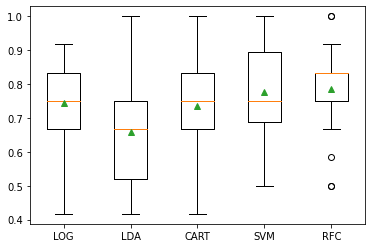

In [192]:
from sklearn.pipeline import Pipeline
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt

# get a list of models to evaluate
def get_models():
    models = dict()
    # Logistic Regression
    rfe = RFE(log_model, 10)
    model = DecisionTreeClassifier()
    models['LOG'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Linear Discriminant Analysis
    rfe = RFE(lda_model, 10)
    model = DecisionTreeClassifier()
    models['LDA'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Classification & Regression Trees
    rfe = RFE(cart_model, 10)
    model = DecisionTreeClassifier()
    models['CART'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Support Vector Machines
    rfe = RFE(svm_model, 10)
    model = DecisionTreeClassifier()
    models['SVM'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Random Forest Classifier
    rfe = RFE(rfc_model, 10)
    model = DecisionTreeClassifier()
    models['RFC'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [193]:
# major_num = []
# log_acc = []
# lda_acc = []
# knn_acc = []
# cart_acc = []
# gnb_acc = []
# svm_acc = []
# rfc_acc = []

# log_auc_list = []
# lda_auc_list = []
# knn_auc_list = []
# cart_auc_list = []
# gnb_auc_list = []
# svm_auc_list = []
# rfc_auc_list = []

# for classnumber in range(76, 344):
#     y = data['condition']

#     features = ['A1_1', 'A1_2', 'A2_1', 'A3_1', 'B1_a', 'B1_a1', 'B1_a2',
#            'B1_a3', 'B1_a4', 'B1_a5', 'B1_a6', 'B1_b', 'B1_b1', 'B1_b2', 'B1_b3',
#            'B1_c', 'B1_d', 'B2_a1', 'B2_a2', 'B2_a3', 'B2_a4', 'B2_a5', 'B2_b1',
#            'B2_b2', 'B2_b3', 'B2_c1', 'B2_c2', 'B2_c4', 'B2_c5', 'B2_c6', 'B2_c7',
#            'B2_d1', 'B2_d2', 'B2_d3', 'B2_d4', 'B2_d5', 'B2_d6', 'B2_d7', 'B2_d8',
#            'B2_d9', 'B3', 'B4_a2', 'B4_a5', 'B5_a2', 'B5_a3', 'B6']
#     X = data[features]

#     X = StandardScaler().fit_transform(X)
#     X = MinMaxScaler().fit_transform(X)

#     sampling_strategy = {0: classnumber, 1: 76}
#     undersample = RandomUnderSampler(sampling_strategy=sampling_strategy)

#     X, y = undersample.fit_resample(X, y)

#     # Transform the dataset using SMOTE
#     oversample = SMOTE()
#     X, y = oversample.fit_resample(X, y)
    
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

#     # Logistic Regression

#     log_model = LogisticRegression()
#     log_model.fit(X_train, y_train)
#     log_pred = log_model.predict(X_test)
# #     print("Logistic Regression:", log_model.score(X_test, y_test).round(3))
#     log_acc.append(log_model.score(X_test, y_test).round(3))

#     # Linear Discriminant Analysis

#     lda_model = LinearDiscriminantAnalysis()
#     lda_model.fit(X_train, y_train)
#     lda_pred = lda_model.predict(X_test)
# #     print("Linear Discriminant Analysis:", lda_model.score(X_test, y_test).round(3))
#     lda_acc.append(lda_model.score(X_test, y_test).round(3))

#     # K-Nearest Neigbors

#     knn_model = KNeighborsClassifier()
#     knn_model.fit(X_train, y_train)
#     knn_pred = knn_model.predict(X_test)
# #     print("K-Nearest Neigbors:", knn_model.score(X_test, y_test).round(3))
#     knn_acc.append(knn_model.score(X_test, y_test).round(3))

#     # Classification and Regression Trees

#     cart_model = DecisionTreeClassifier()
#     cart_model.fit(X_train, y_train)
#     cart_pred = cart_model.predict(X_test)
# #     print("Classification and Regression Trees:", cart_model.score(X_test, y_test).round(3))
#     cart_acc.append(cart_model.score(X_test, y_test).round(3))

#     # Gaussian Naive Bayes

#     gnb_model = GaussianNB()
#     gnb_model.fit(X_train, y_train)
#     gnb_pred = gnb_model.predict(X_test)
# #     print("Gaussian Naive Bayes:", gnb_model.score(X_test, y_test).round(3))
#     gnb_acc.append(gnb_model.score(X_test, y_test).round(3))

#     # Support Vector Machines

#     svm_model = SVC(kernel='linear', gamma = 'auto', probability=True)
#     svm_model.fit(X_train, y_train)
#     svm_pred = svm_model.predict(X_test)
# #     print("Support Vector Machines:", svm_model.score(X_test, y_test).round(3))
#     svm_acc.append(svm_model.score(X_test, y_test).round(3))

#     # Random Forest Classifier

#     rfc_model = RandomForestClassifier()
#     rfc_model.fit(X_train, y_train)
#     rfc_pred = rfc_model.predict(X_test)
# #     print("Random Forest Classifier:", rfc_model.score(X_test, y_test).round(3))
#     rfc_acc.append(rfc_model.score(X_test, y_test).round(3))
    
#     major_num.append(classnumber)
    
#     # Logistic Regression

#     # predict probabilities
#     log_probs = log_model.predict_proba(X_test)
#     # keep probabilities for the positive outcome only
#     log_probs = log_probs[:, 1]
#     # calculate roc curves
#     log_fpr, log_tpr, log_thresholds = roc_curve(y_test, log_probs)
#     # calculate the g-mean for each threshold
#     log_gmeans = np.sqrt(log_tpr * (1-log_fpr))
#     # locate the index of the largest g-mean
#     log_ix = np.argmax(log_gmeans)
    
#     log_auc_list.append(auc(log_fpr, log_tpr))


#     # Linear Discriminant Analysis

#     # predict probabilities
#     lda_probs = lda_model.predict_proba(X_test)
#     # keep probabilities for the positive outcome only
#     lda_probs = lda_probs[:, 1]
#     # calculate roc curves
#     lda_fpr, lda_tpr, lda_thresholds = roc_curve(y_test, lda_probs)
#     # calculate the g-mean for each threshold
#     lda_gmeans = np.sqrt(lda_tpr * (1-lda_fpr))
#     # locate the index of the largest g-mean
#     lda_ix = np.argmax(lda_gmeans)
    
#     lda_auc_list.append(auc(lda_fpr, lda_tpr))
    
#     # K-Nearest Neigbors

#     # predict probabilities
#     knn_probs = knn_model.predict_proba(X_test)
#     # keep probabilities for the positive outcome only
#     knn_probs = knn_probs[:, 1]
#     # calculate roc curves
#     knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_probs)
#     # calculate the g-mean for each threshold
#     knn_gmeans = np.sqrt(knn_tpr * (1-knn_fpr))
#     # locate the index of the largest g-mean
#     knn_ix = np.argmax(knn_gmeans)
    
#     knn_auc_list.append(auc(knn_fpr, knn_tpr))

#     # Classification and Regression Trees

#     # predict probabilities
#     cart_probs = cart_model.predict_proba(X_test)
#     # keep probabilities for the positive outcome only
#     cart_probs = cart_probs[:, 1]
#     # calculate roc curves
#     cart_fpr, cart_tpr, cart_thresholds = roc_curve(y_test, cart_probs)
#     # calculate the g-mean for each threshold
#     cart_gmeans = np.sqrt(cart_tpr * (1-cart_fpr))
#     # locate the index of the largest g-mean
#     cart_ix = np.argmax(cart_gmeans)
    
#     cart_auc_list.append(auc(cart_fpr, cart_tpr))

#     # Gaussian Naive Bayes

#     # predict probabilities
#     gnb_probs = gnb_model.predict_proba(X_test)
#     # keep probabilities for the positive outcome only
#     gnb_probs = gnb_probs[:, 1]
#     # calculate roc curves
#     gnb_fpr, gnb_tpr, gnb_thresholds = roc_curve(y_test, gnb_probs)
#     # calculate the g-mean for each threshold
#     gnb_gmeans = np.sqrt(gnb_tpr * (1-gnb_fpr))
#     # locate the index of the largest g-mean
#     gnb_ix = np.argmax(gnb_gmeans)
    
#     gnb_auc_list.append(auc(gnb_fpr, gnb_tpr))

#     # Support Vector Machines

#     # predict probabilities
#     svm_probs = svm_model.predict_proba(X_test)
#     # keep probabilities for the positive outcome only
#     svm_probs = svm_probs[:, 1]
#     # calculate roc curves
#     svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_probs)
#     # calculate the g-mean for each threshold
#     svm_gmeans = np.sqrt(svm_tpr * (1-svm_fpr))
#     # locate the index of the largest g-mean
#     svm_ix = np.argmax(svm_gmeans)
    
#     svm_auc_list.append(auc(svm_fpr, svm_tpr))

#     # Random Forest Classifier

#     # predict probabilities
#     rfc_probs = rfc_model.predict_proba(X_test)
#     # keep probabilities for the positive outcome only
#     rfc_probs = rfc_probs[:, 1]
#     # calculate roc curves
#     rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_test, rfc_probs)
#     # calculate the g-mean for each threshold
#     rfc_gmeans = np.sqrt(rfc_tpr * (1-rfc_fpr))
#     # locate the index of the largest g-mean
#     rfc_ix = np.argmax(rfc_gmeans)
    
#     rfc_auc_list.append(auc(rfc_fpr, rfc_tpr))

In [194]:
# # Logistic Regression

# plt.plot(major_num, log_acc, label='Logistic Regression')
# # axis labels
# plt.xlabel('Majority Class Size')
# plt.ylabel('Accuracy')
# plt.legend()
# # show the plot
# plt.show()

In [195]:
# # Linear Discriminant Analysis

# plt.plot(major_num, lda_acc, label='Linear Discriminant Analysis')
# # axis labels
# plt.xlabel('Majority Class Size')
# plt.ylabel('Accuracy')
# plt.legend()
# # show the plot
# plt.show()

In [196]:
# # K-Nearest Neighbor

# plt.plot(major_num, knn_acc, label='K-Nearest Neighbor')
# # axis labels
# plt.xlabel('Majority Class Size')
# plt.ylabel('Accuracy')
# plt.legend()
# # show the plot
# plt.show()

In [197]:
# # Classification & Regression Tree

# plt.plot(major_num, cart_acc, label='Classification & Regression Tree')
# # axis labels
# plt.xlabel('Majority Class Size')
# plt.ylabel('Accuracy')
# plt.legend()
# # show the plot
# plt.show()

In [198]:
# # Gaussian Naive Bayes

# plt.plot(major_num, gnb_acc, label='Gaussian Naive Bayes')
# # axis labels
# plt.xlabel('Majority Class Size')
# plt.ylabel('Accuracy')
# plt.legend()
# # show the plot
# plt.show()

In [199]:
# # Support Vector Machines

# plt.plot(major_num, svm_acc, label='Support Vector Machines')
# # axis labels
# plt.xlabel('Majority Class Size')
# plt.ylabel('Accuracy')
# plt.legend()
# # show the plot
# plt.show()

In [200]:
# # Random Forest Classifier

# plt.plot(major_num, rfc_acc, label='Random Forest Classifier')
# # axis labels
# plt.xlabel('Majority Class Size')
# plt.ylabel('Accuracy')
# plt.legend()
# # show the plot
# plt.show()

In [201]:
# # Logistic Regression

# plt.plot(major_num, log_auc_list, label='Logistic Regression')
# # axis labels
# plt.xlabel('Majority Class Size')
# plt.ylabel('AUC')
# plt.legend()
# # show the plot
# plt.show()

In [202]:
# # Linear Discriminant Analysis

# plt.plot(major_num, lda_auc_list, label='Linear Discriminant Analysis')
# # axis labels
# plt.xlabel('Majority Class Size')
# plt.ylabel('AUC')
# plt.legend()
# # show the plot
# plt.show()

In [203]:
# # K-Nearest Neighbor

# plt.plot(major_num, knn_auc_list, label='K-Nearest Neighbor')
# # axis labels
# plt.xlabel('Majority Class Size')
# plt.ylabel('AUC')
# plt.legend()
# # show the plot
# plt.show()

In [204]:
# # Classification & Regression Tree

# plt.plot(major_num, cart_auc_list, label='Classification & Regression Tree')
# # axis labels
# plt.xlabel('Majority Class Size')
# plt.ylabel('AUC')
# plt.legend()
# # show the plot
# plt.show()

In [205]:
# # Gaussian Naive Bayes

# plt.plot(major_num, gnb_auc_list, label='Gaussian Naive Bayes')
# # axis labels
# plt.xlabel('Majority Class Size')
# plt.ylabel('AUC')
# plt.legend()
# # show the plot
# plt.show()

In [206]:
# # Support Vector Machines

# plt.plot(major_num, svm_auc_list, label='Support Vector Machines')
# # axis labels
# plt.xlabel('Majority Class Size')
# plt.ylabel('AUC')
# plt.legend()
# # show the plot
# plt.show()

In [207]:
# # Random Forest Classifier

# plt.plot(major_num, rfc_auc_list, label='Random Forest Classifier')
# # axis labels
# plt.xlabel('Majority Class Size')
# plt.ylabel('AUC')
# plt.legend()
# # show the plot
# plt.show()